# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

---

## Task 1: Load the Data

In [129]:
# Import Libraries for Data Cleaning, Analysis and Visualization
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
# Get working directory
pwd

'C:\\Users\\XPS 13 9305\\Desktop\\Projects\\Data Science Projects\\Online Retail'

In [76]:
# Load the data into a dataframe and view first 5 rows
df=pd.read_excel('C:\\Users\\XPS 13 9305\\Desktop\\Projects\\Data Science Projects\\Online Retail/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [78]:
# Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [79]:
# Checking for missing values in %
(df.isnull().sum()/ len(df) ) *100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [80]:
# Check number of rows and columns
df.shape

(541909, 8)

---

## Task 2: Perform data cleaning

To carry out the data cleaning process,the following should be noted
1. Customer ID is should not be a float number, therefore it needs to be converted to an object. 
2. Missing values in the customer id column should be treated. This values will be dropped after inspection
3. Split the date and time from the invoice column
4. The description column is redundadant, hence it will be dropped.

In [81]:
# Convert float to object
df['CustomerID']=df['CustomerID'].astype('object')


In [82]:
# Inspecting rows with missing Customer ID
df.loc[df ['CustomerID'].isna()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [83]:
# Delete rows with missing Customer ID
df.dropna(axis=0,inplace=True)

In [84]:
# Extract date and time from datetime column
df['Date']=pd.to_datetime(df['InvoiceDate'].dt.date)
df['Year']=df['InvoiceDate'].dt.year.astype('object')
df['Month']=df['InvoiceDate'].dt.month.astype('object')
df['Hour']=df['InvoiceDate'].dt.hour.astype('object')
df['Weekday']= df['Date'].dt.weekday
df['Weekday'] = df['Date'].dt.strftime('%A')

In [85]:
# Drop the Description column
#df.drop(columns='Description', inplace=True)

In [86]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday


In [87]:
# Check data to see if changes has been effected
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  object        
 7   Country      406829 non-null  object        
 8   Date         406829 non-null  datetime64[ns]
 9   Year         406829 non-null  object        
 10  Month        406829 non-null  object        
 11  Hour         406829 non-null  object        
 12  Weekday      406829 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(9)
memory usage: 43.5+ MB


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
Date           0
Year           0
Month          0
Hour           0
Weekday        0
dtype: int64

---

## Task 3: Explore Basic Statistics

In [88]:
# Check for summary statistics
df.describe()

,Quantity,UnitPrice
count,406829.000000,406829.000000
mean,12.061303,3.460471
std,248.693370,69.315162
min,-80995.000000,0.000000
25%,2.000000,1.250000
50%,5.000000,1.950000
75%,12.000000,3.750000
max,80995.000000,38970.000000


In [89]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Year,Month,Hour,Weekday
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010,12,8,Wednesday


In [90]:
# Create a new feature called Revenue
df['Revenue']= df['Quantity'] * df['UnitPrice']

In [91]:
# Some statistics in our data
print('Number of unique countries are :', df['Country'].nunique())
print('Number of unique customers  are:',df['CustomerID'].nunique())
print('Number of unique stock are:', df['StockCode'].nunique())
print('Number of unique transactions are:', df['InvoiceNo'].nunique())

Number of unique countries are : 37
Number of unique customers  are: 4372
Number of unique stock are: 3684
Number of unique transactions are: 22190


---

## Task 4:Data Visualization

#### Revenue 

Let's take a dive into our revenue and see 
- how revenue is distrubuted
- Most valuable Customers
- Performance by Countries
- Products generating the highest revenue
- Seasonal trends

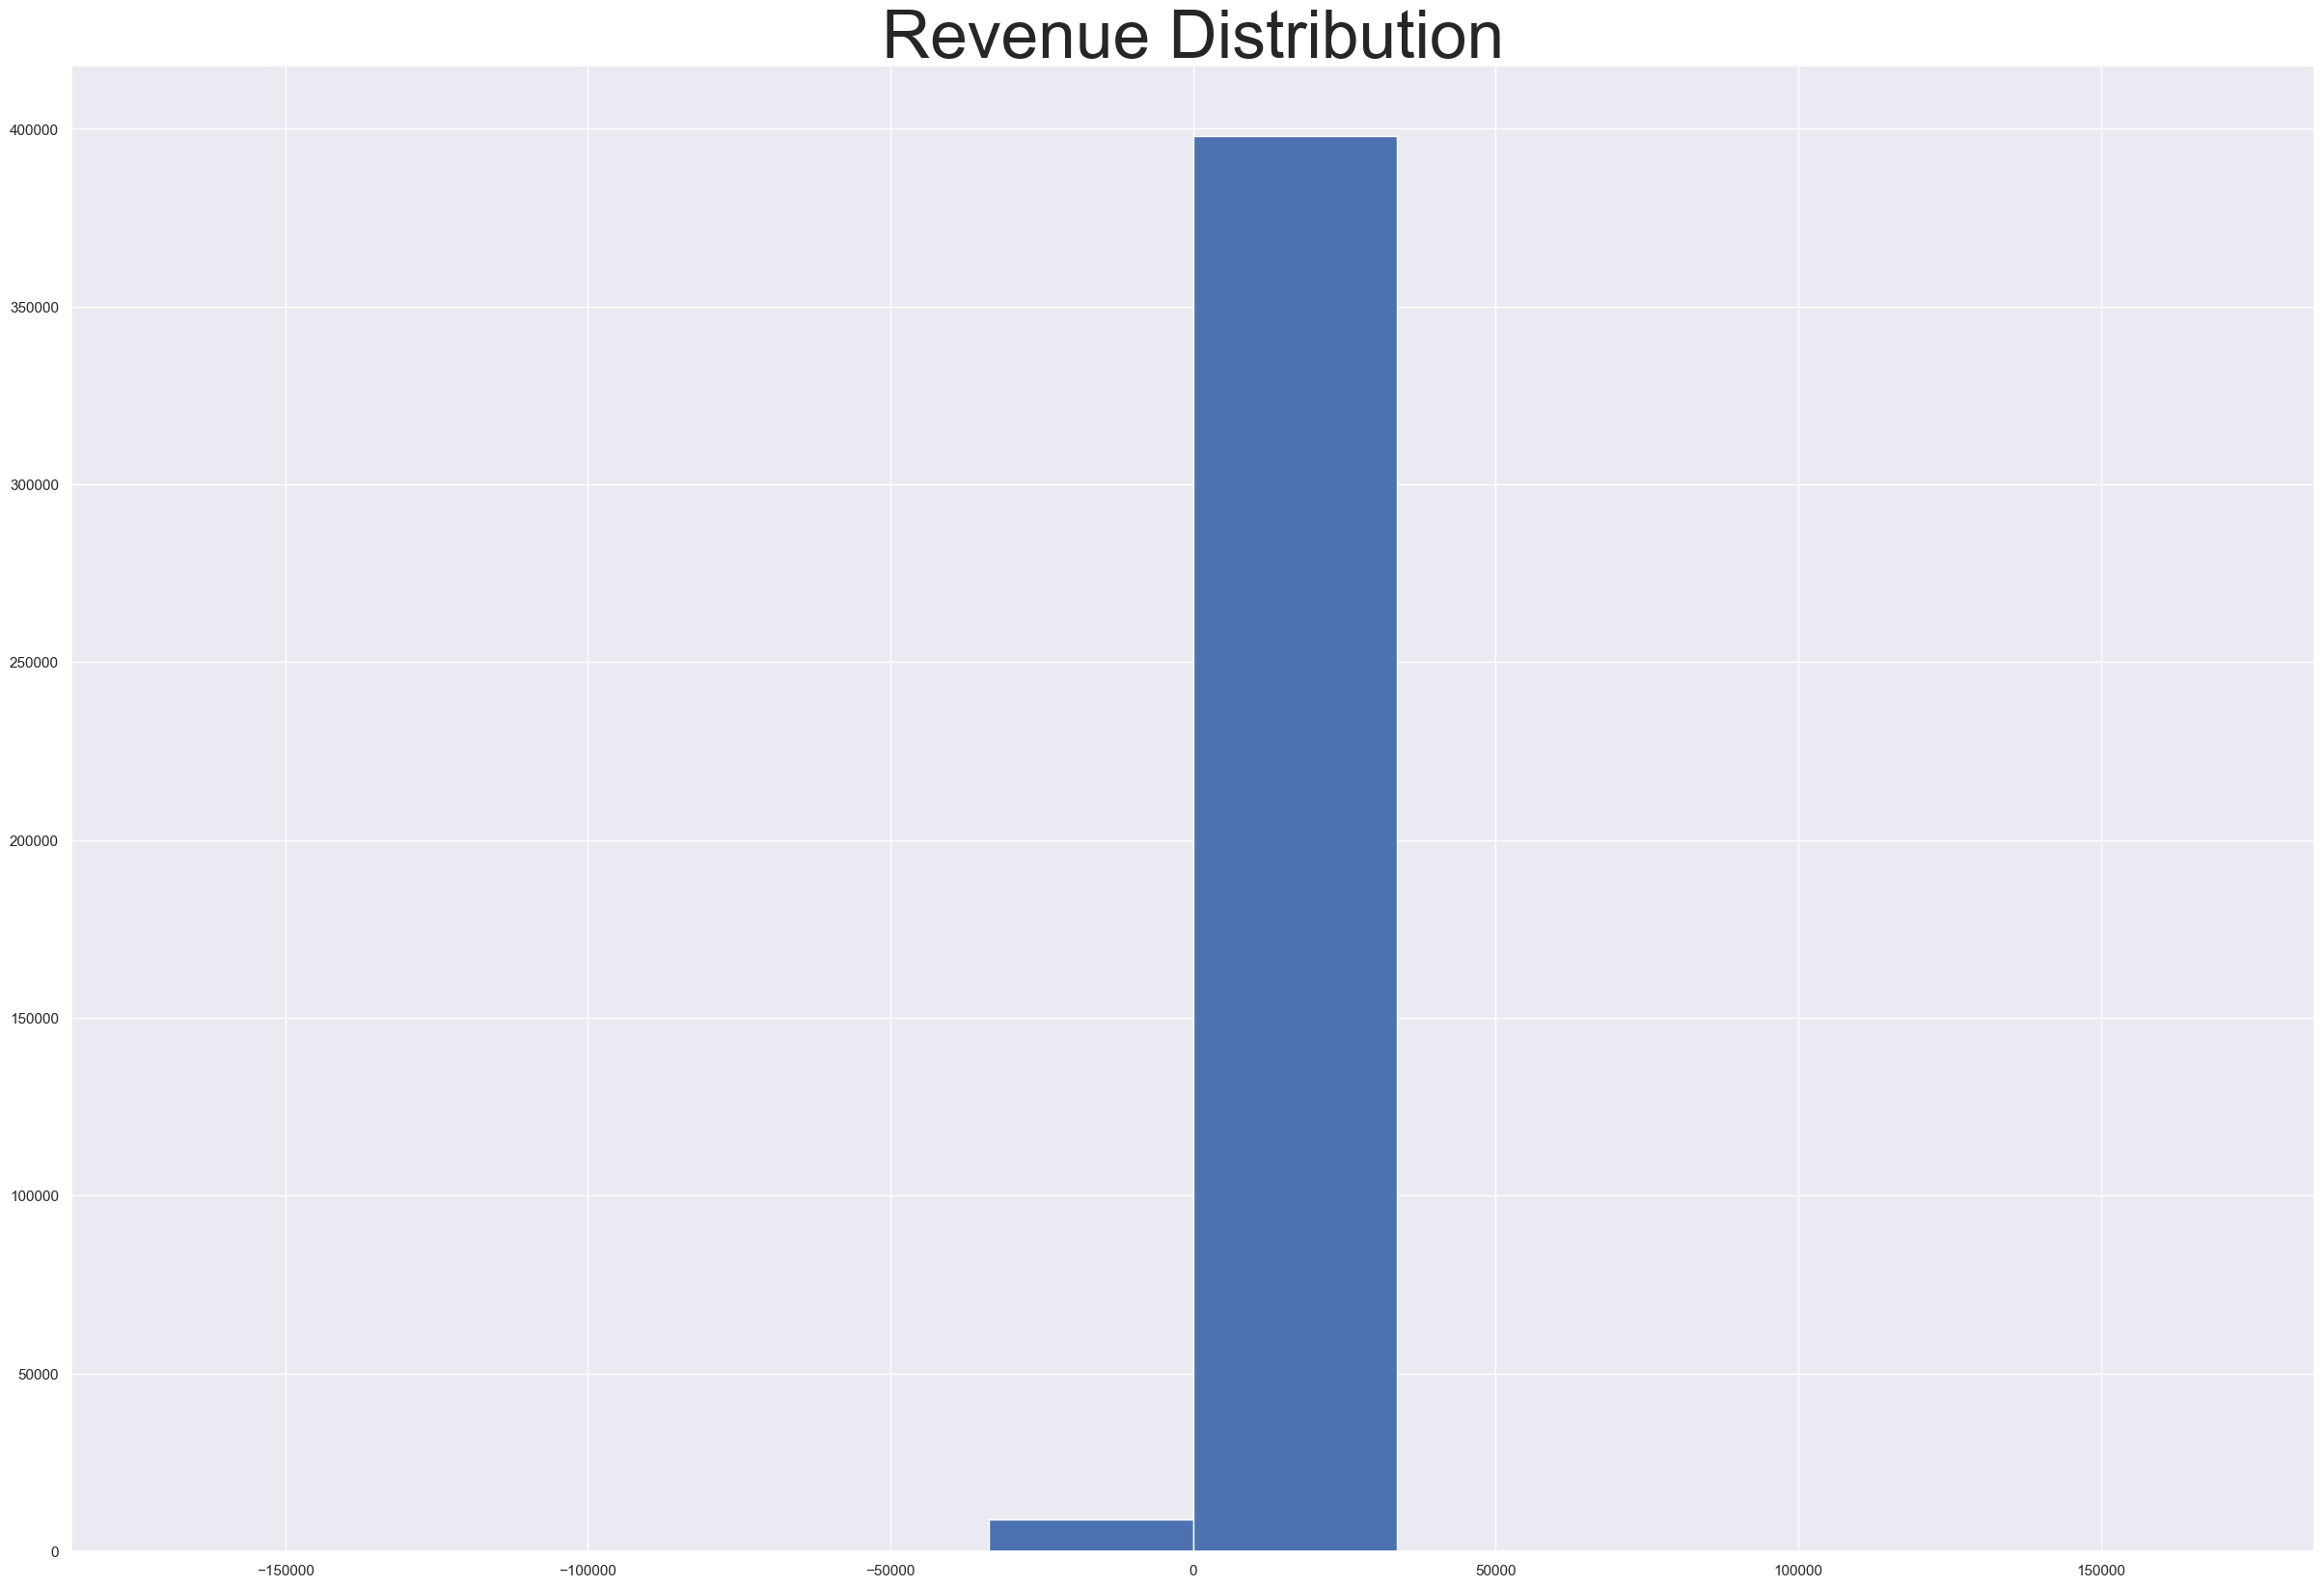

In [106]:
# Revenue Distribution plot
df['Revenue'].hist()
plt.title('Revenue Distribution',fontdict = {'fontsize' : 50})
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20;

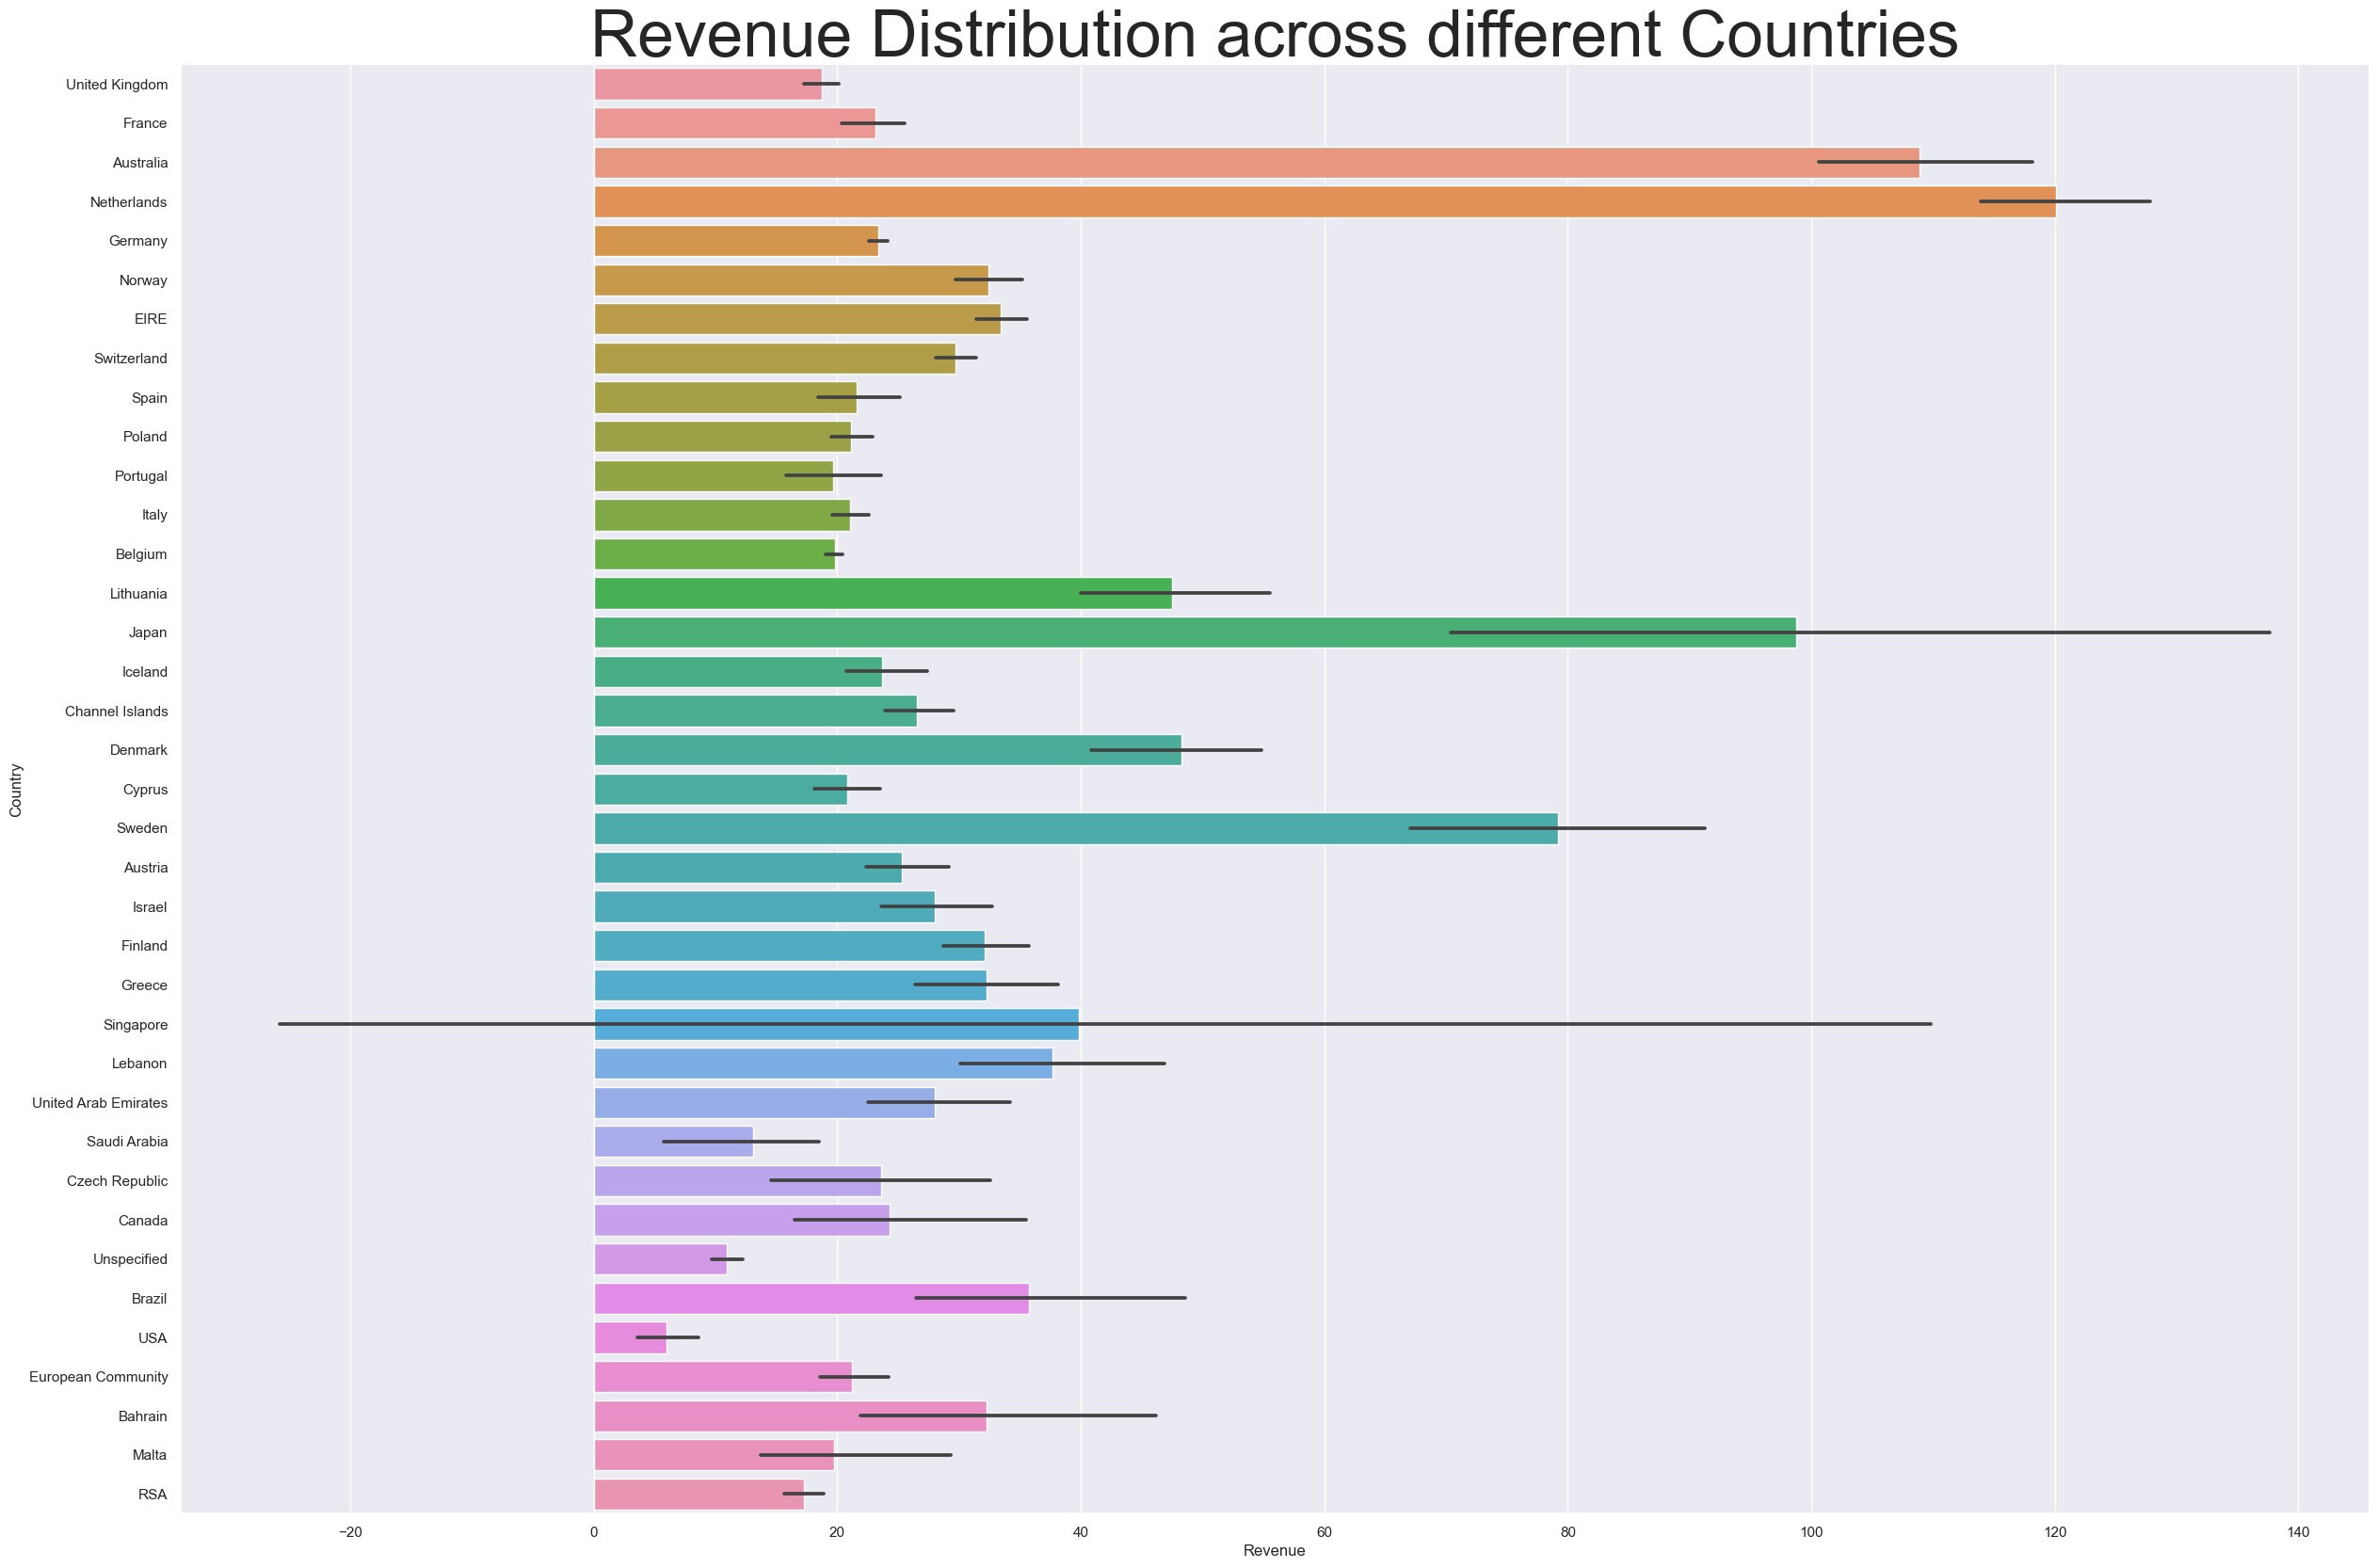

In [108]:
# Country by revenue
sns.barplot(y=df['Country'], x=df['Revenue'])
plt.xlabel('Revenue')
plt.ylabel('Country')
plt.title("Revenue Distribution across different Countries",fontdict = {'fontsize' : 50})
sns.set(rc={'figure.figsize':(30,20)})
sns.set_style('darkgrid')

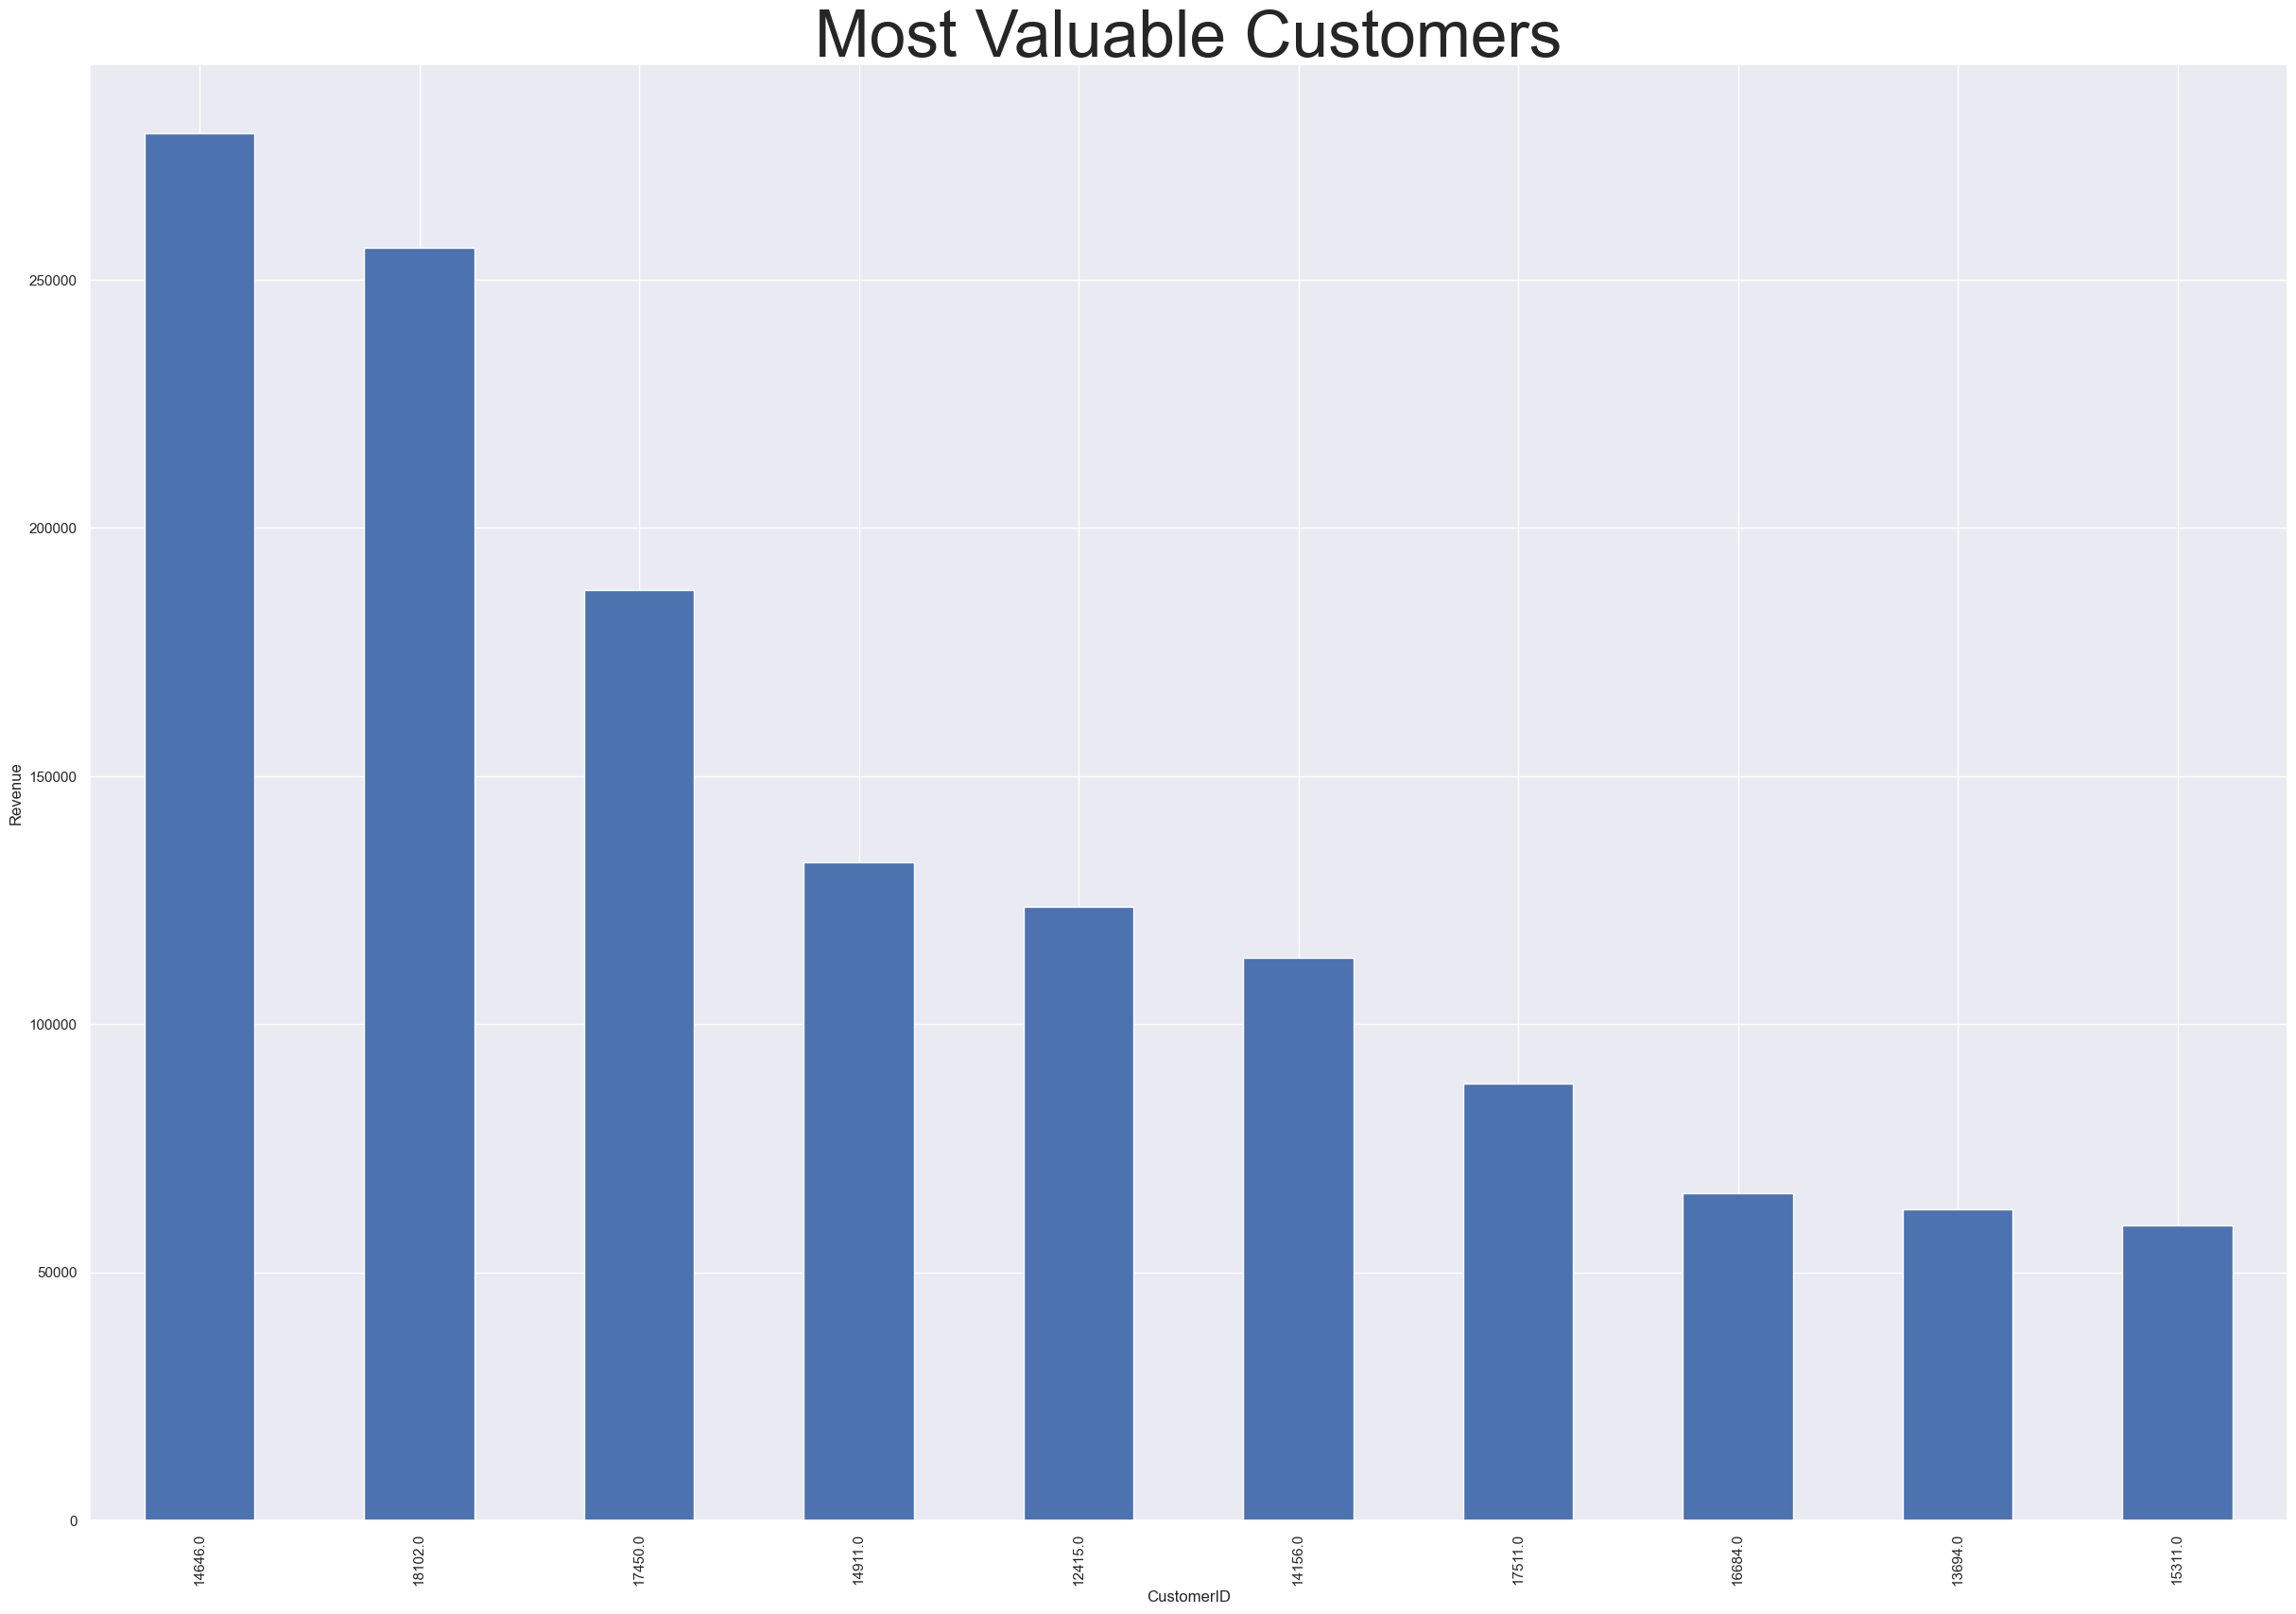

In [121]:
# Top 10 Customers by revenue
df.groupby('CustomerID')['Revenue'].sum().nlargest(10).plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('Revenue')
plt.title("Most Valuable Customers",fontdict = {'fontsize' : 50})
sns.set(rc={'figure.figsize':(20,20)})

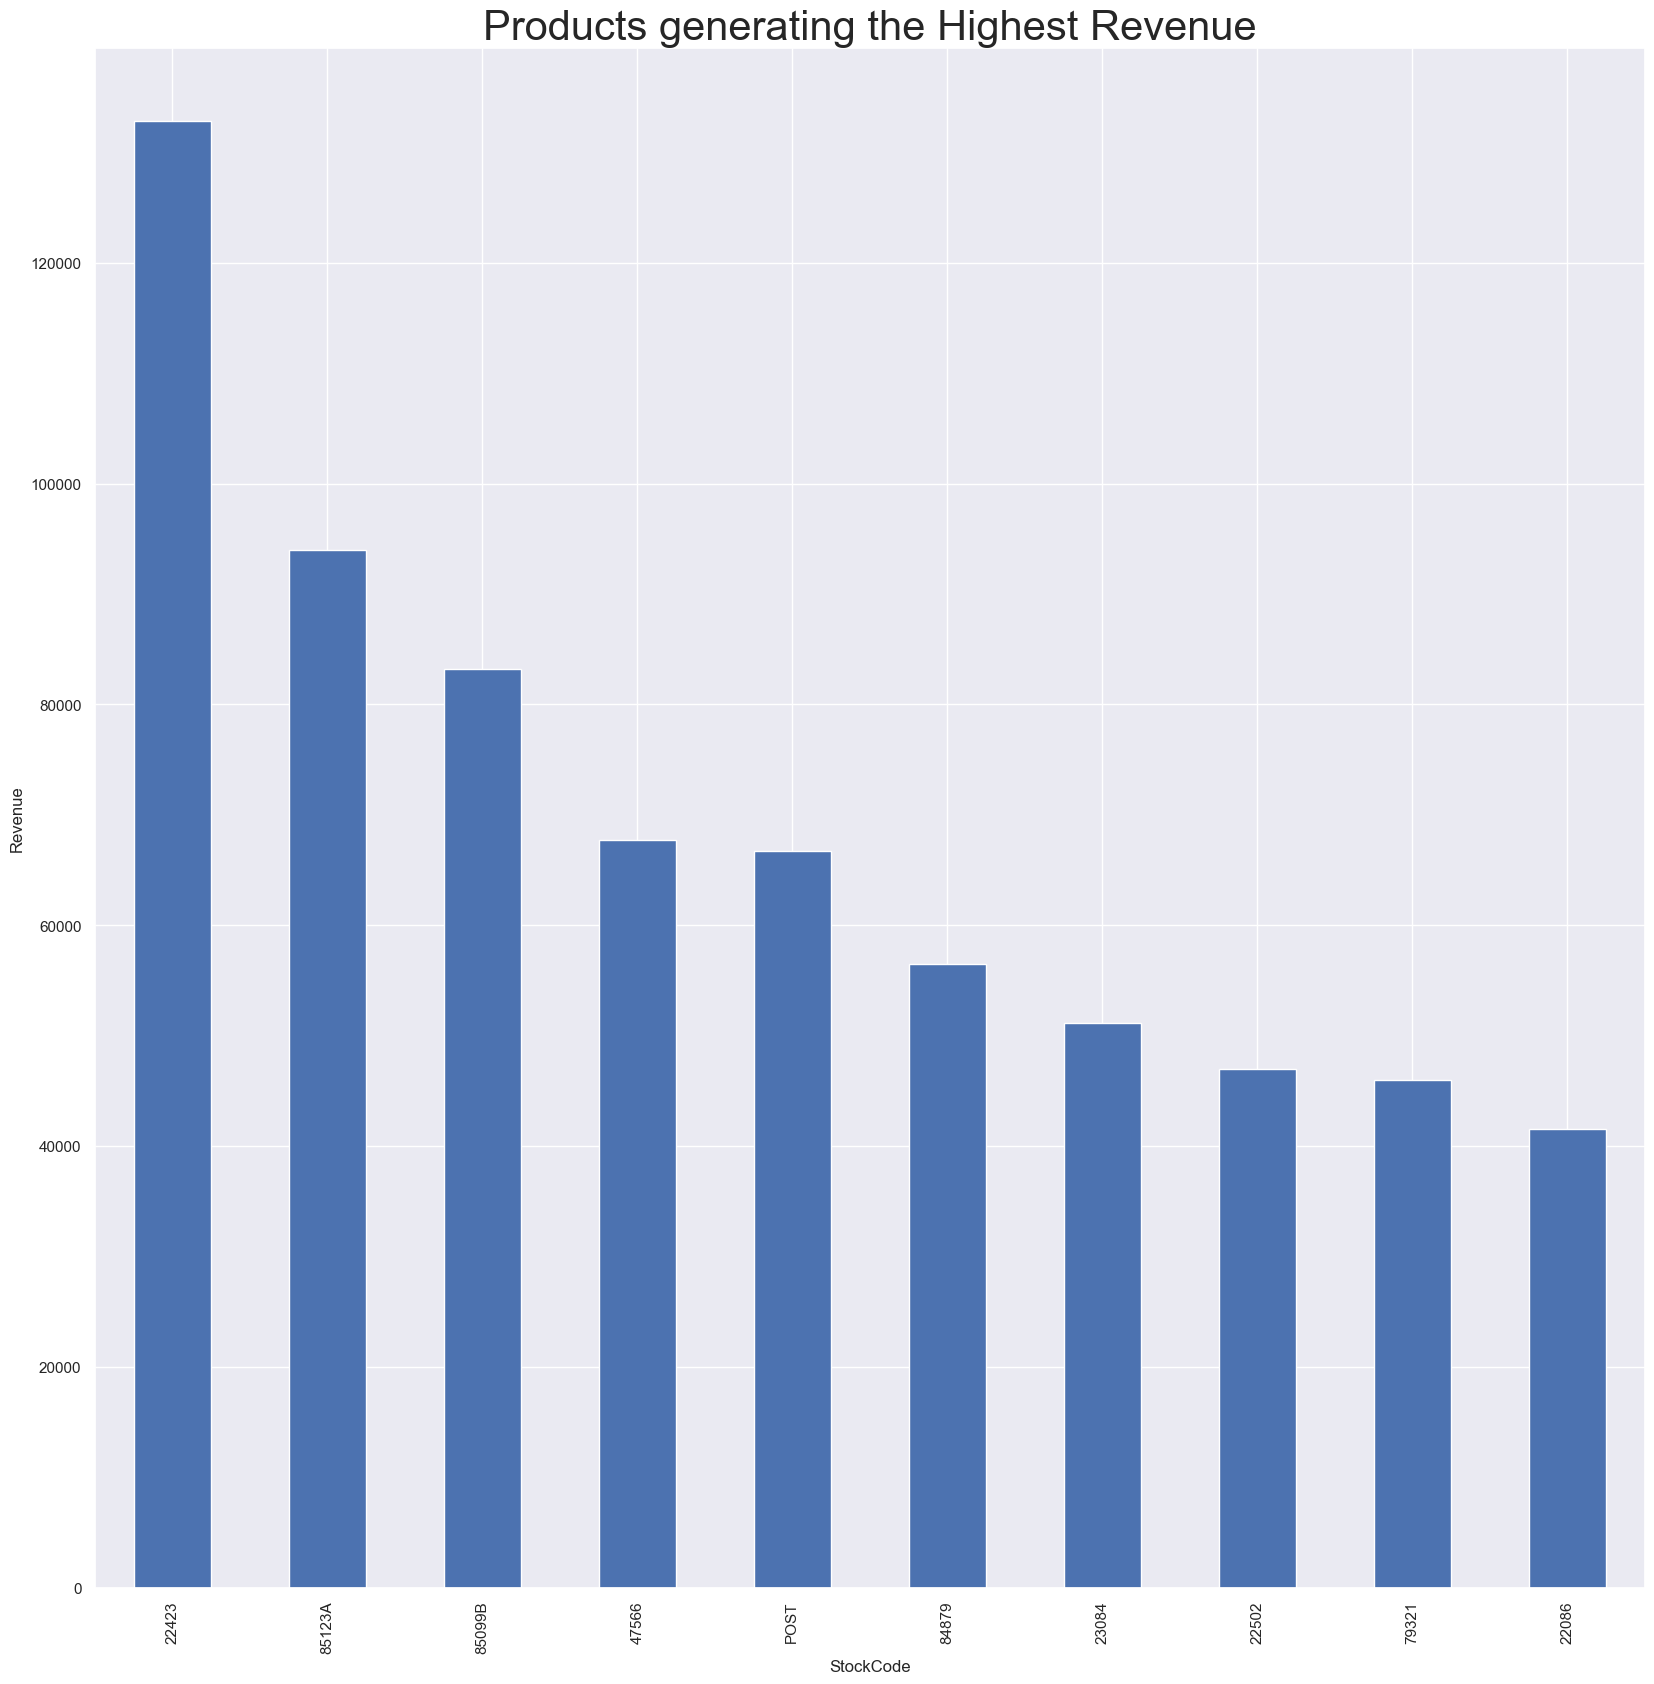

In [124]:
# Top selling products
df.groupby('StockCode')['Revenue'].sum().nlargest(10).plot(kind='bar')
plt.xlabel('StockCode')
plt.ylabel('Revenue')
plt.title("Products generating the Highest Revenue",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

In [236]:
# tOP 10 Products Revenue Contribution 
(df.groupby('StockCode')['Revenue'].sum().nlargest(10)/df['Revenue'].sum()) *100

StockCode
22423     1.600835
85123A    1.132271
85099B    1.002845
47566     0.815506
POST      0.803731
84879     0.680708
23084     0.616113
22502     0.566031
79321     0.553451
22086     0.500002
Name: Revenue, dtype: float64

In [127]:
# Bottom selling products
df.groupby('StockCode')['Revenue'].sum().sort_values(ascending=True).head(10)

StockCode
M        -58385.46
CRUK      -7933.43
D         -5696.22
22769       -87.80
79323W      -54.00
85063       -46.85
35400       -45.70
21645       -39.60
79323P      -27.00
20703       -25.50
Name: Revenue, dtype: float64

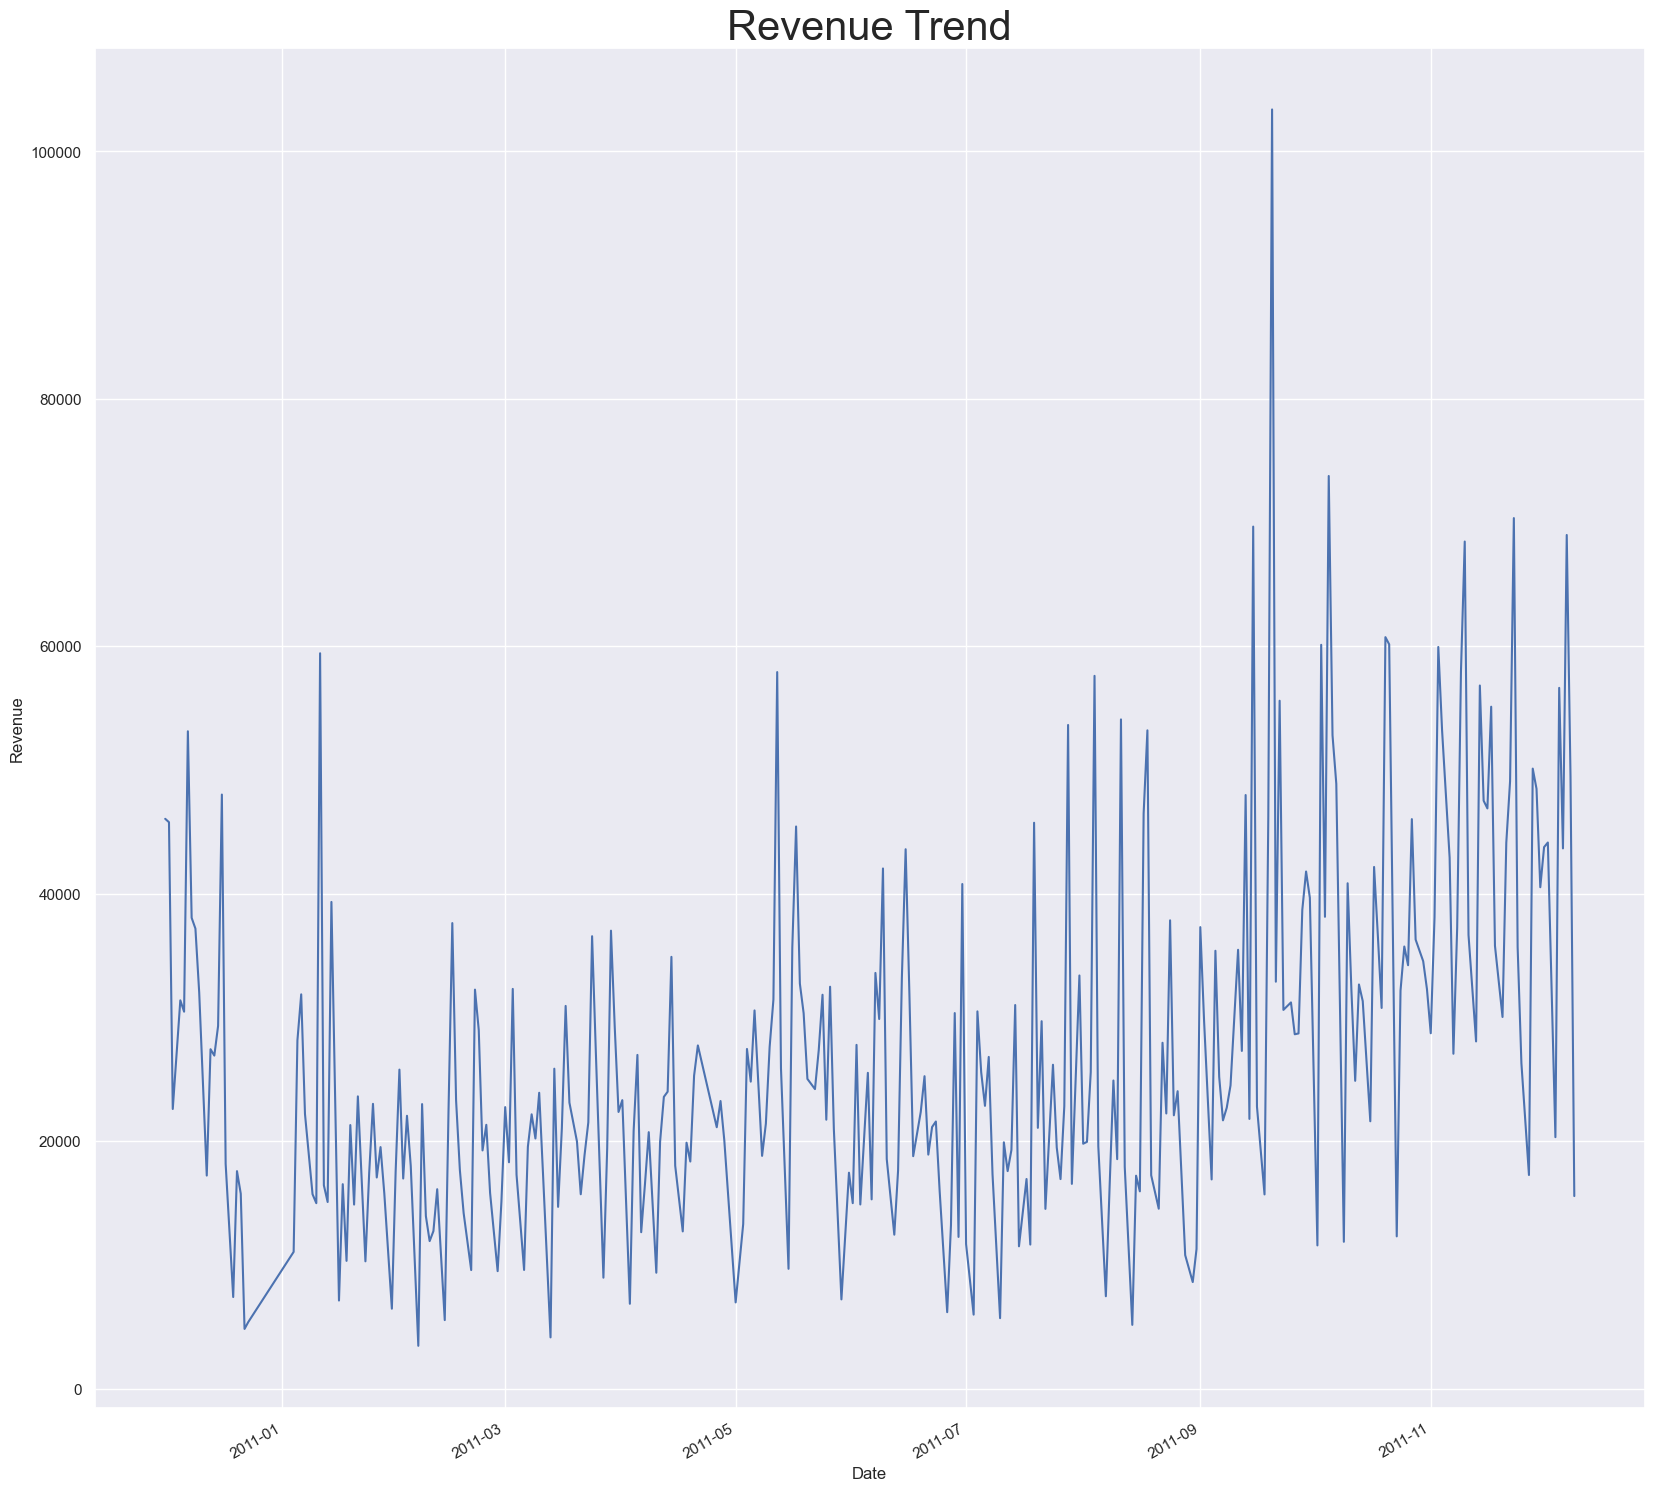

In [144]:
# Revenue trend
df.groupby('Date')['Revenue'].sum().plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.title("Revenue Trend",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

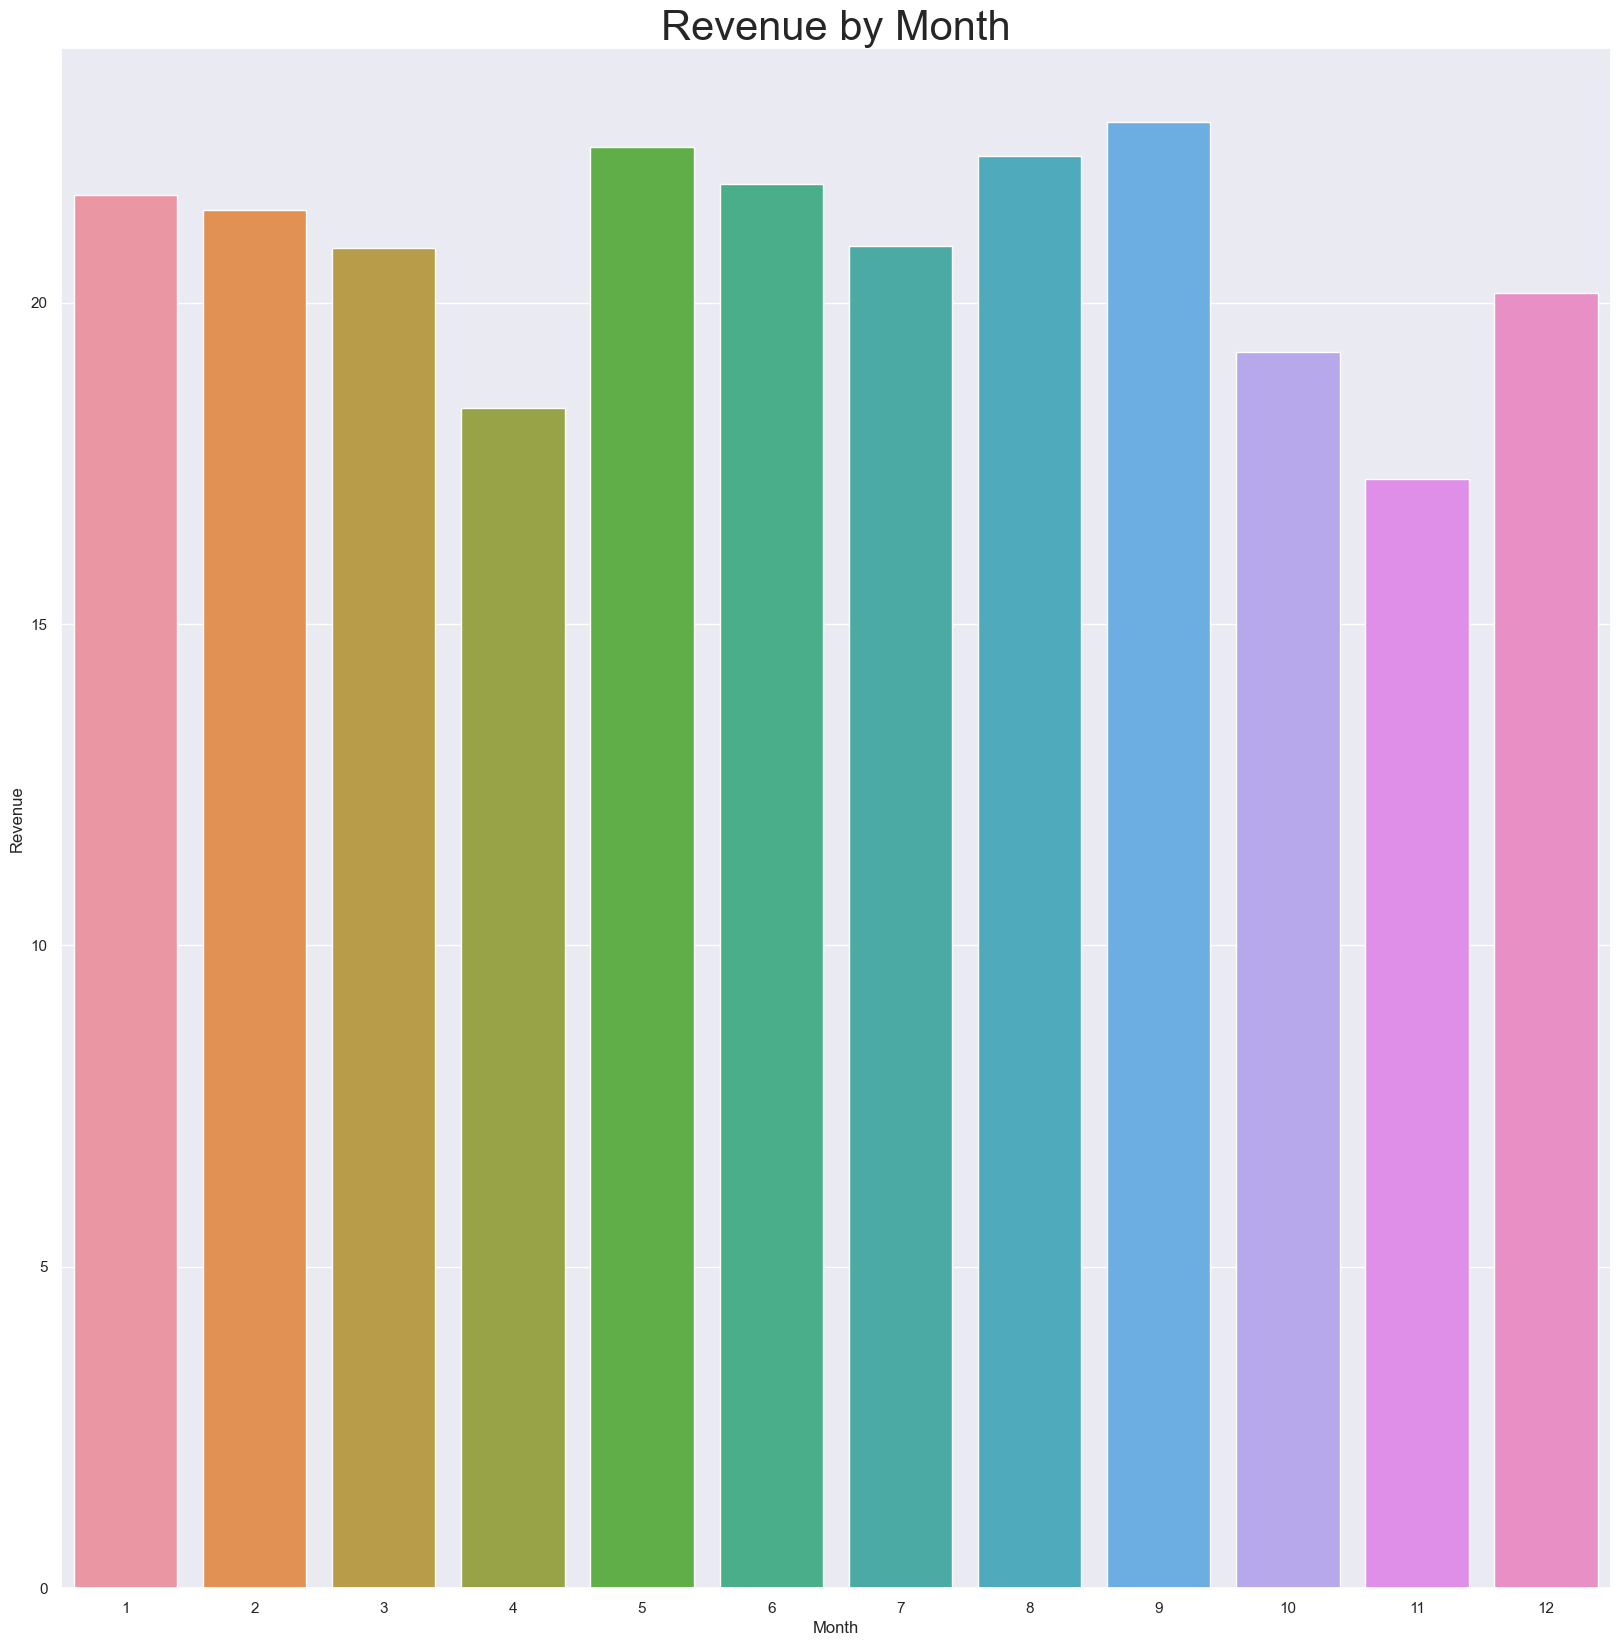

In [145]:
# Revenue by month
ax=sns.barplot(data=df,x='Month', y='Revenue',errorbar=None)
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.title("Revenue by Month",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

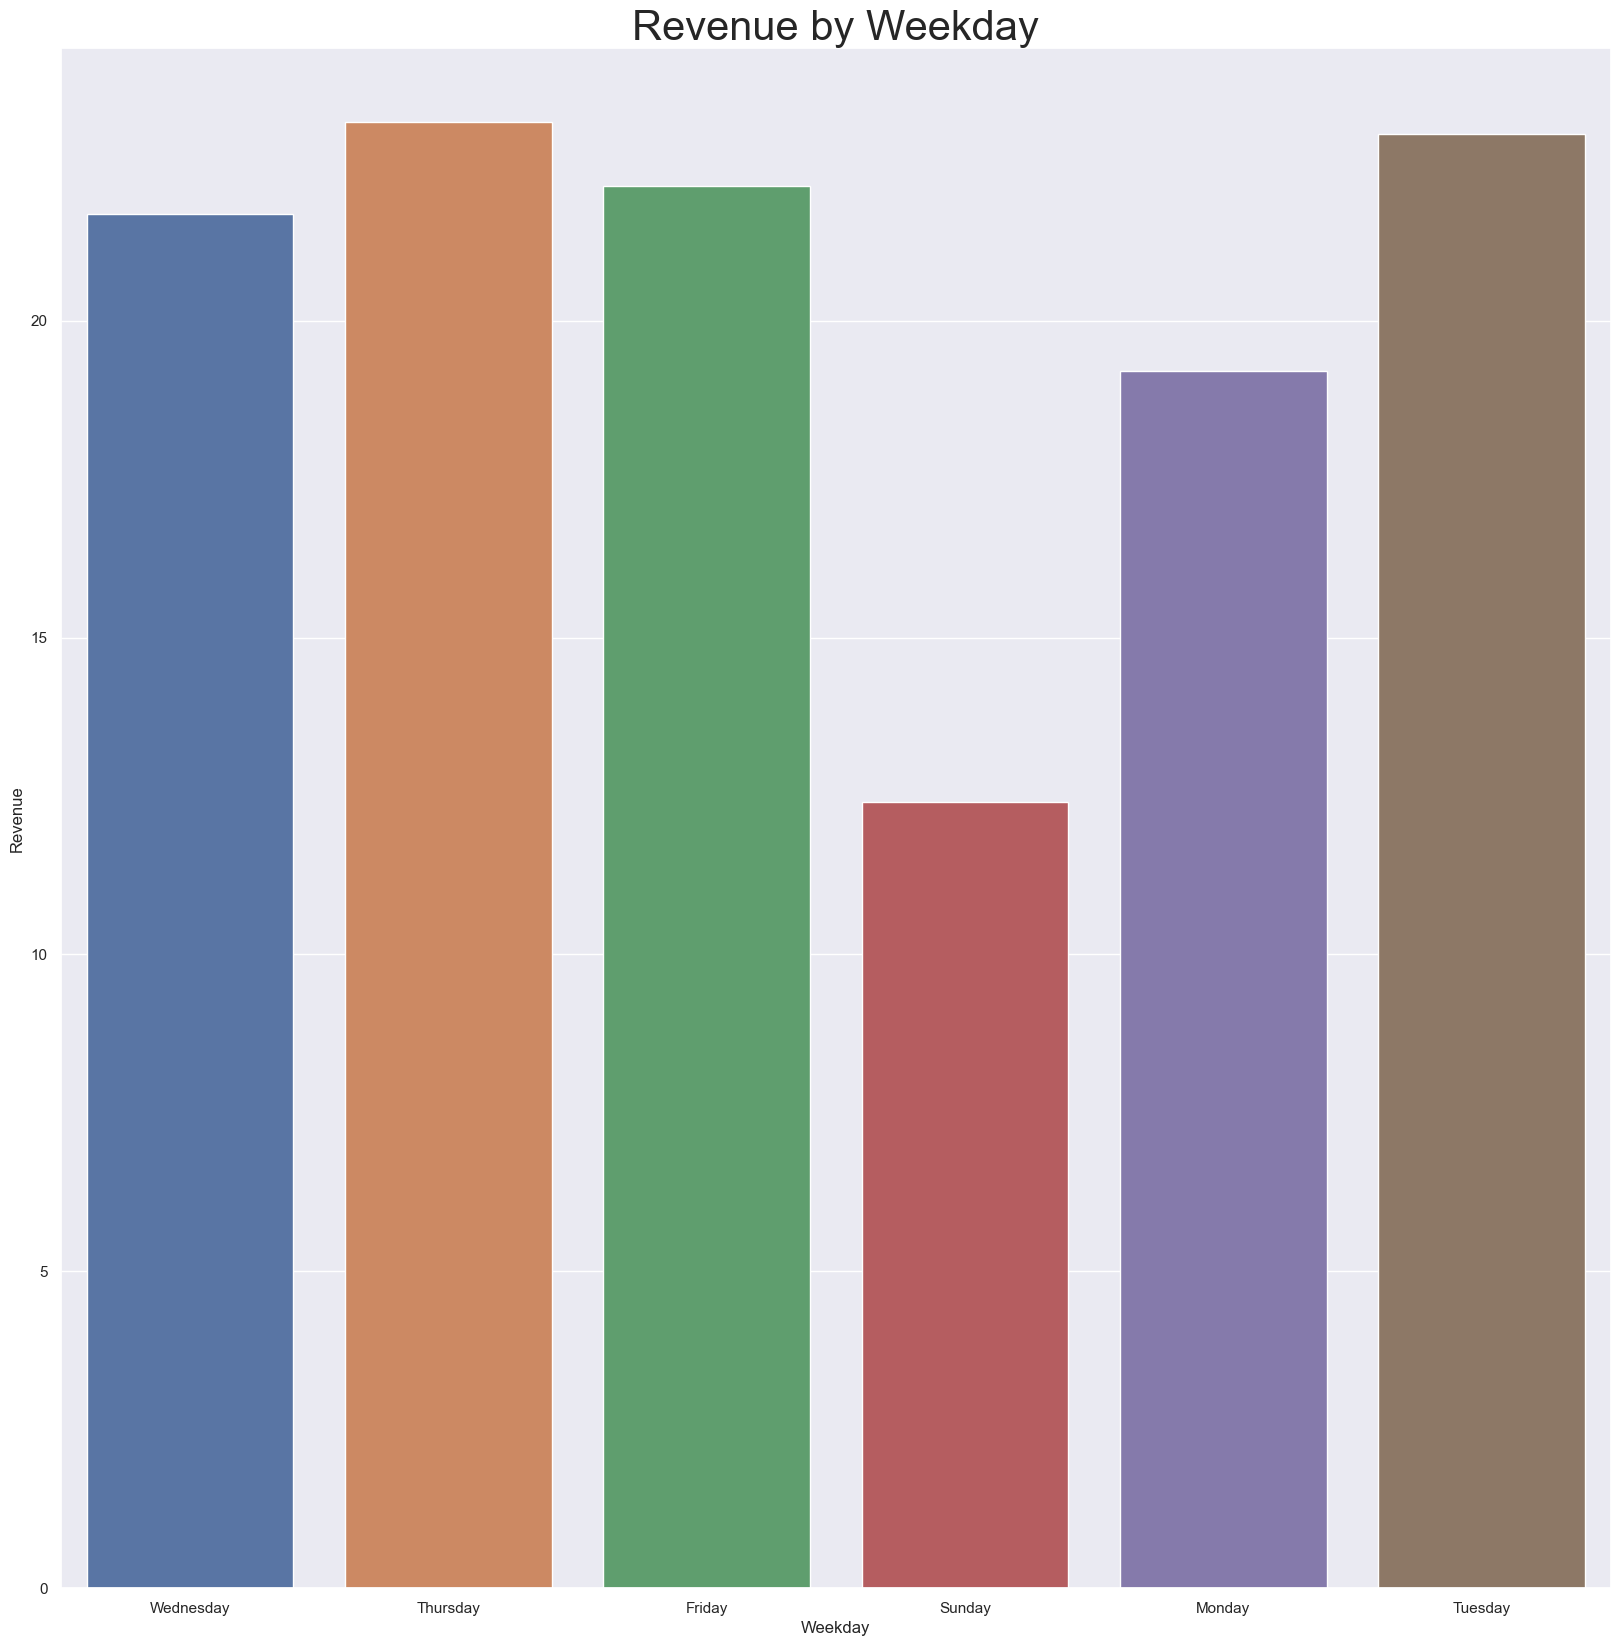

In [141]:
# Revenue by Weekday
ax=sns.barplot(data=df,x='Weekday', y='Revenue',errorbar=None,)
plt.xlabel('Weekday')
plt.ylabel('Revenue')
plt.title("Revenue by Weekday",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

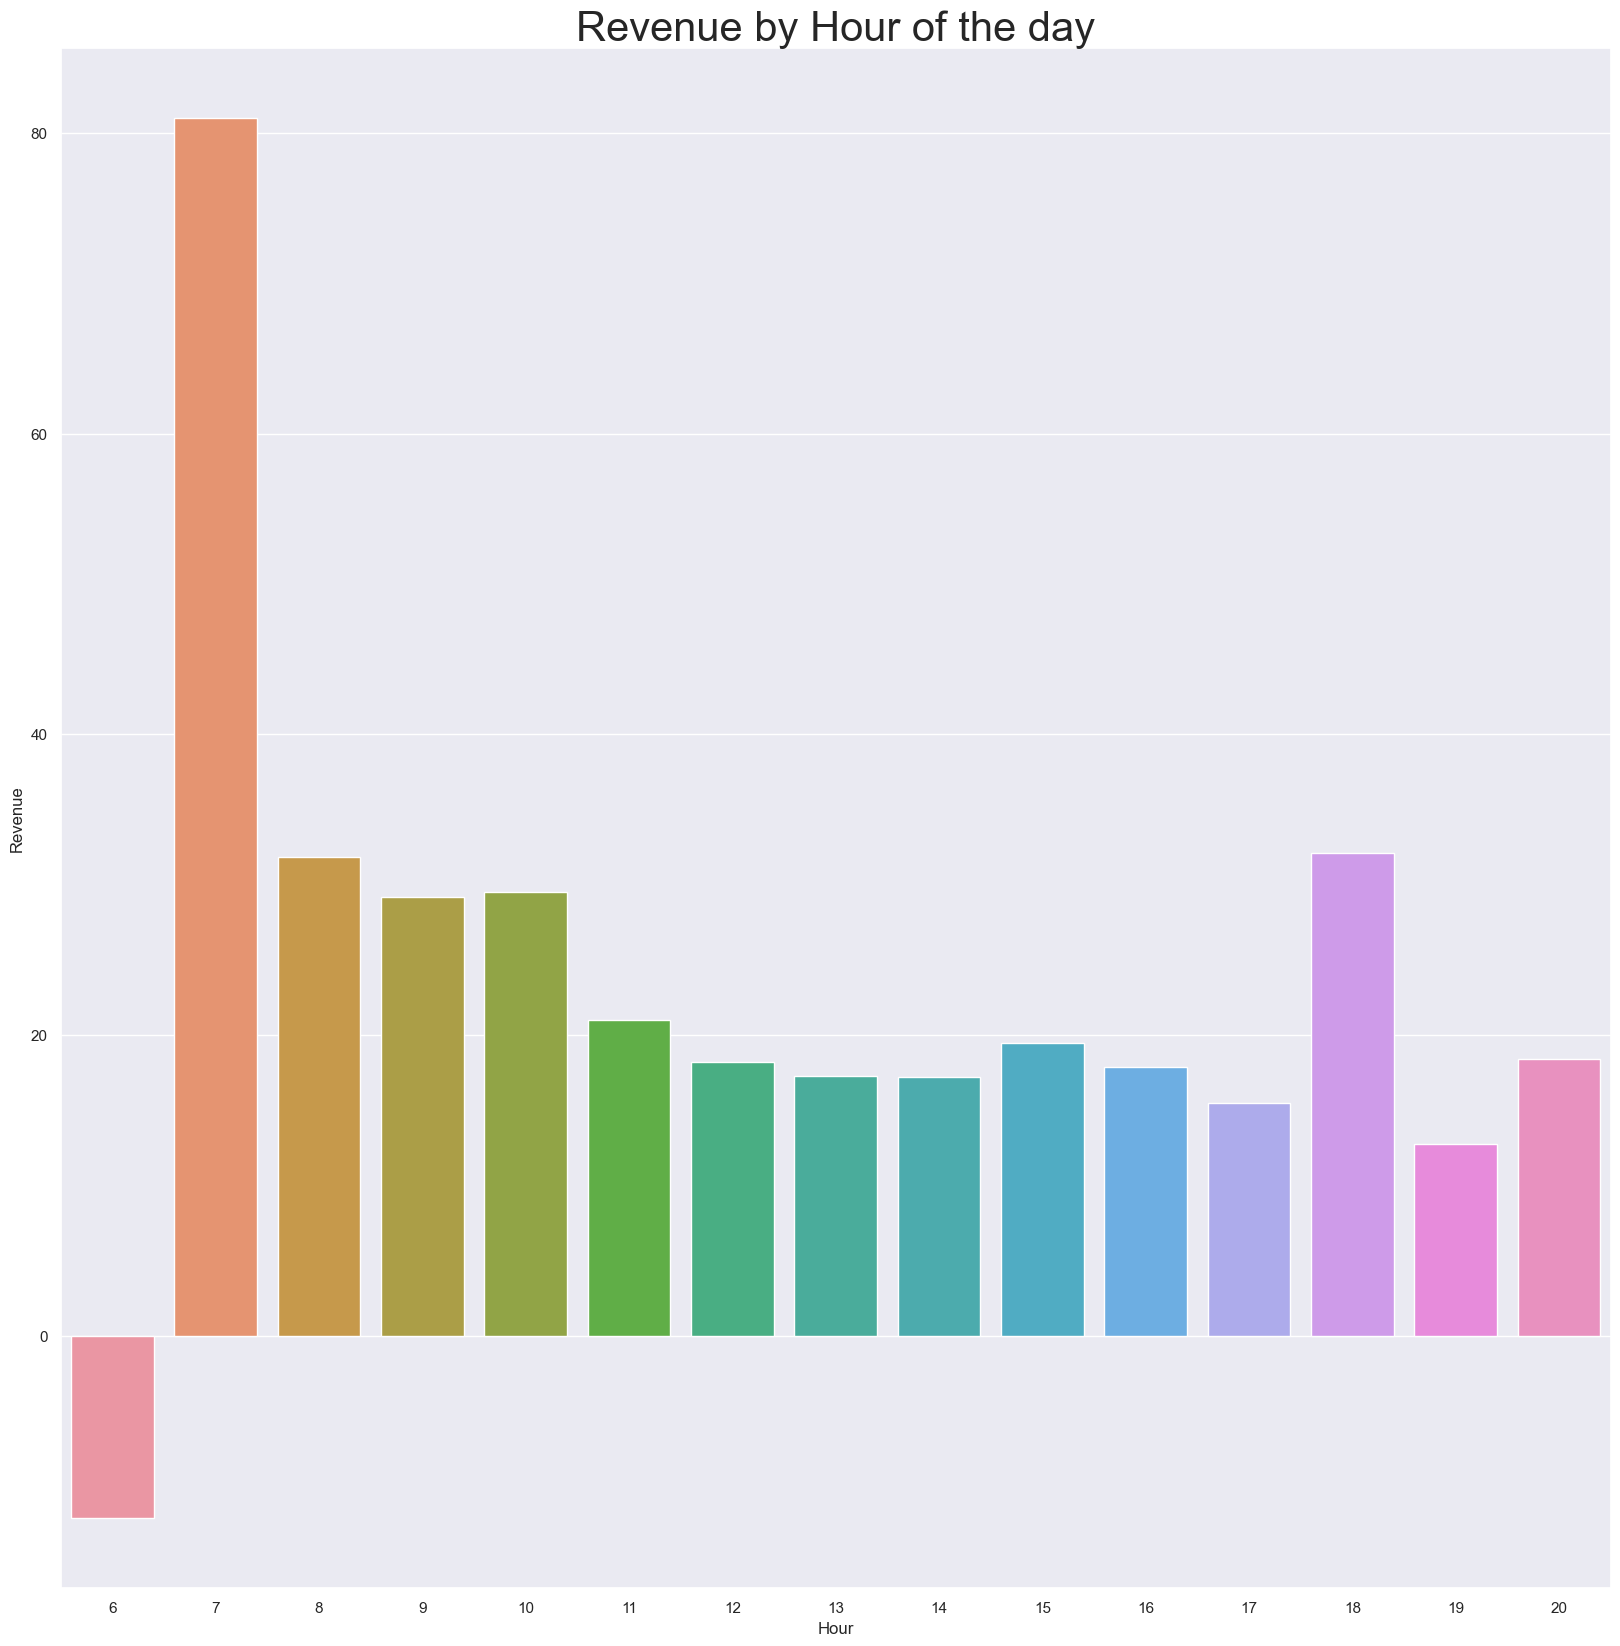

In [143]:
# Revenue by Time of the day
ax=sns.barplot(data=df,x='Hour', y='Revenue',errorbar=None)
plt.xlabel('Hour')
plt.ylabel('Revenue')
plt.title("Revenue by Hour of the day",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

#### Product

Lets dive into the product analysis to find out the following
- Best selling product 
- Least selling products
- Countries selling the most product

<Axes: >

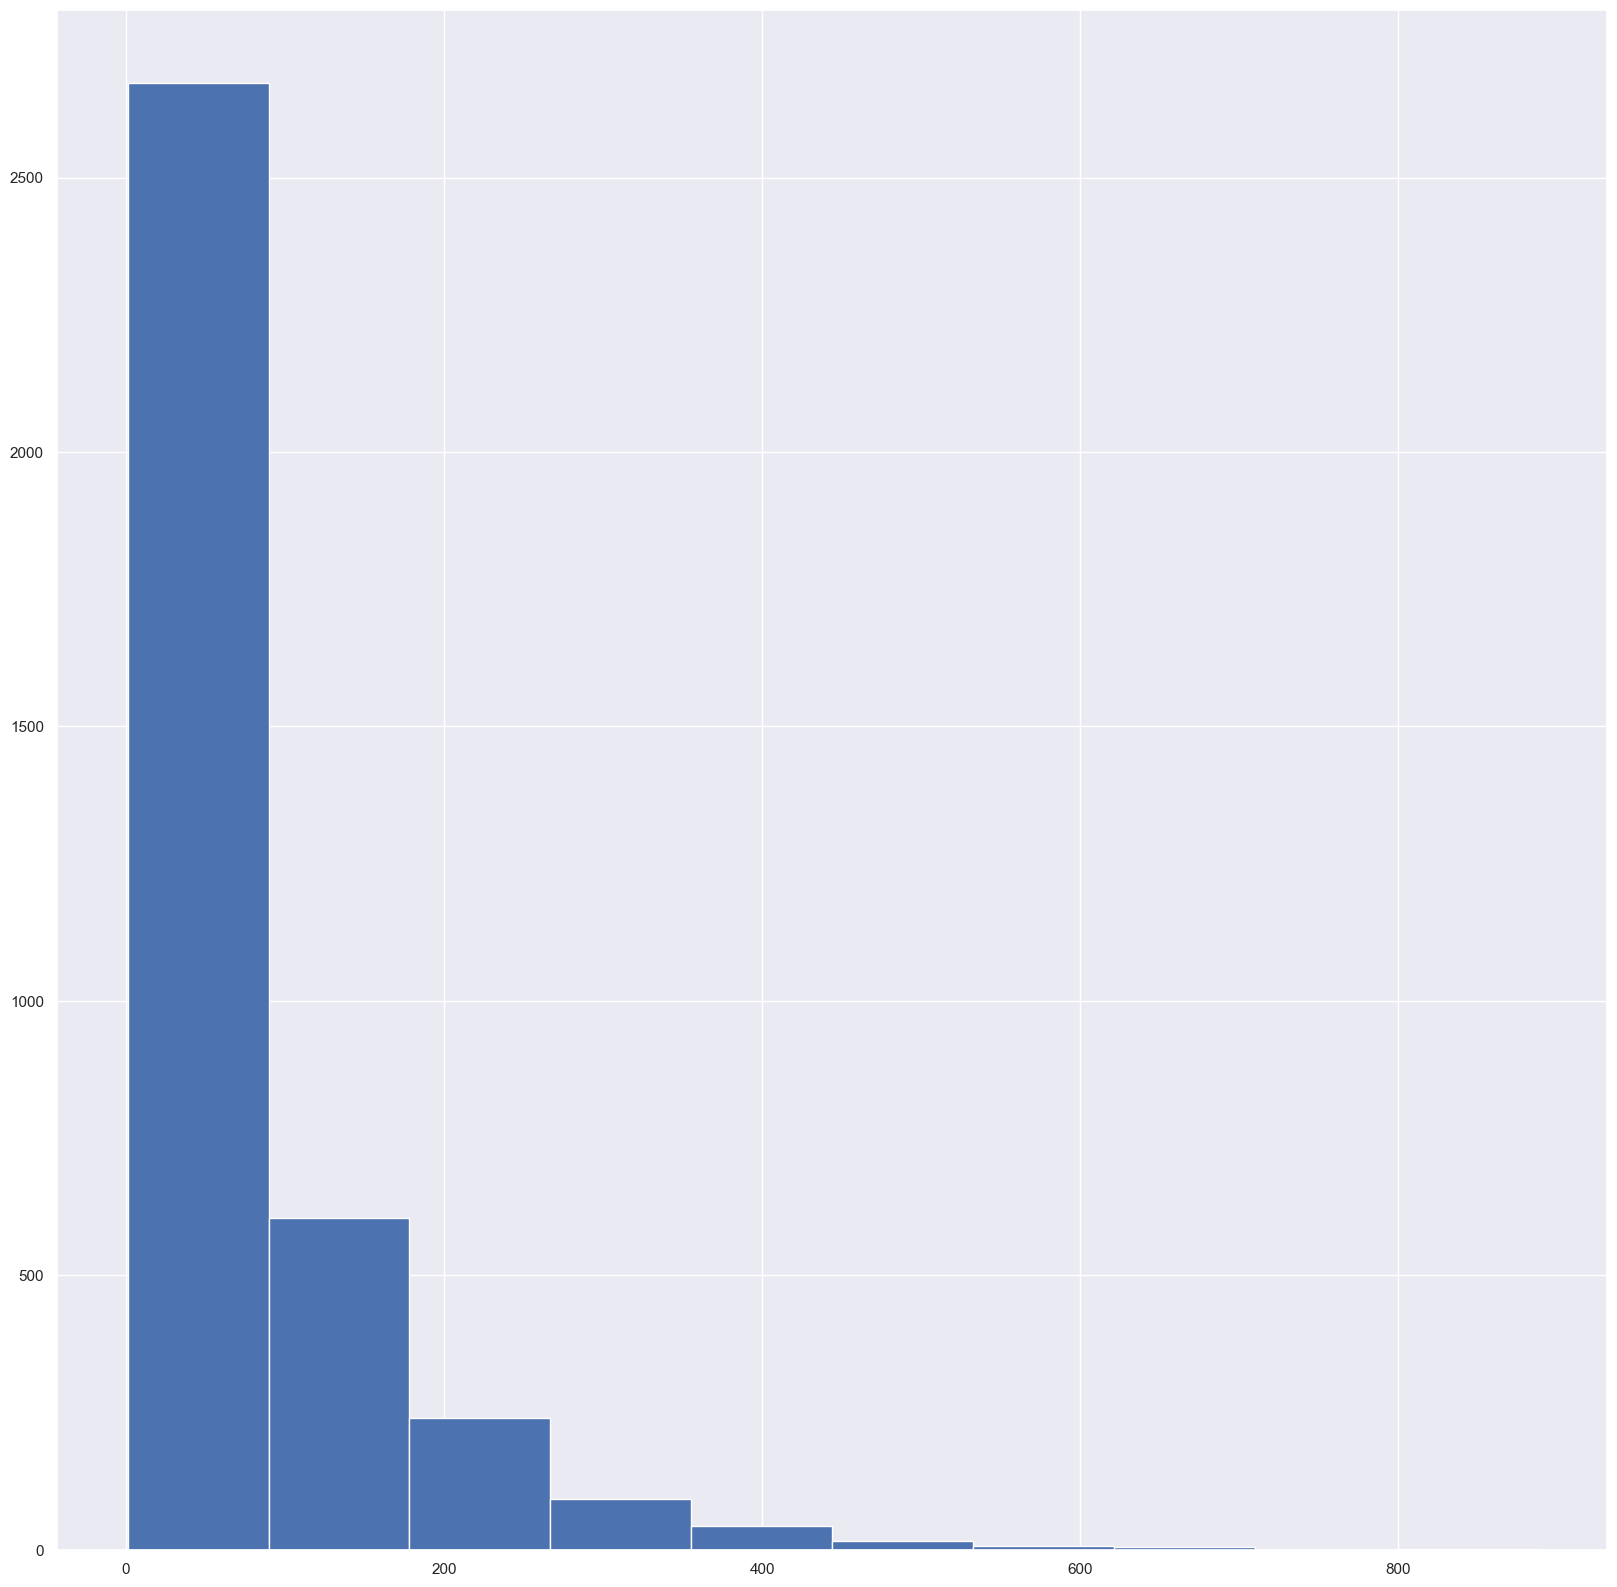

In [237]:
# Distribution of products bought by customers.
df.groupby('StockCode')['CustomerID'].nunique().sort_values(ascending=True).hist()

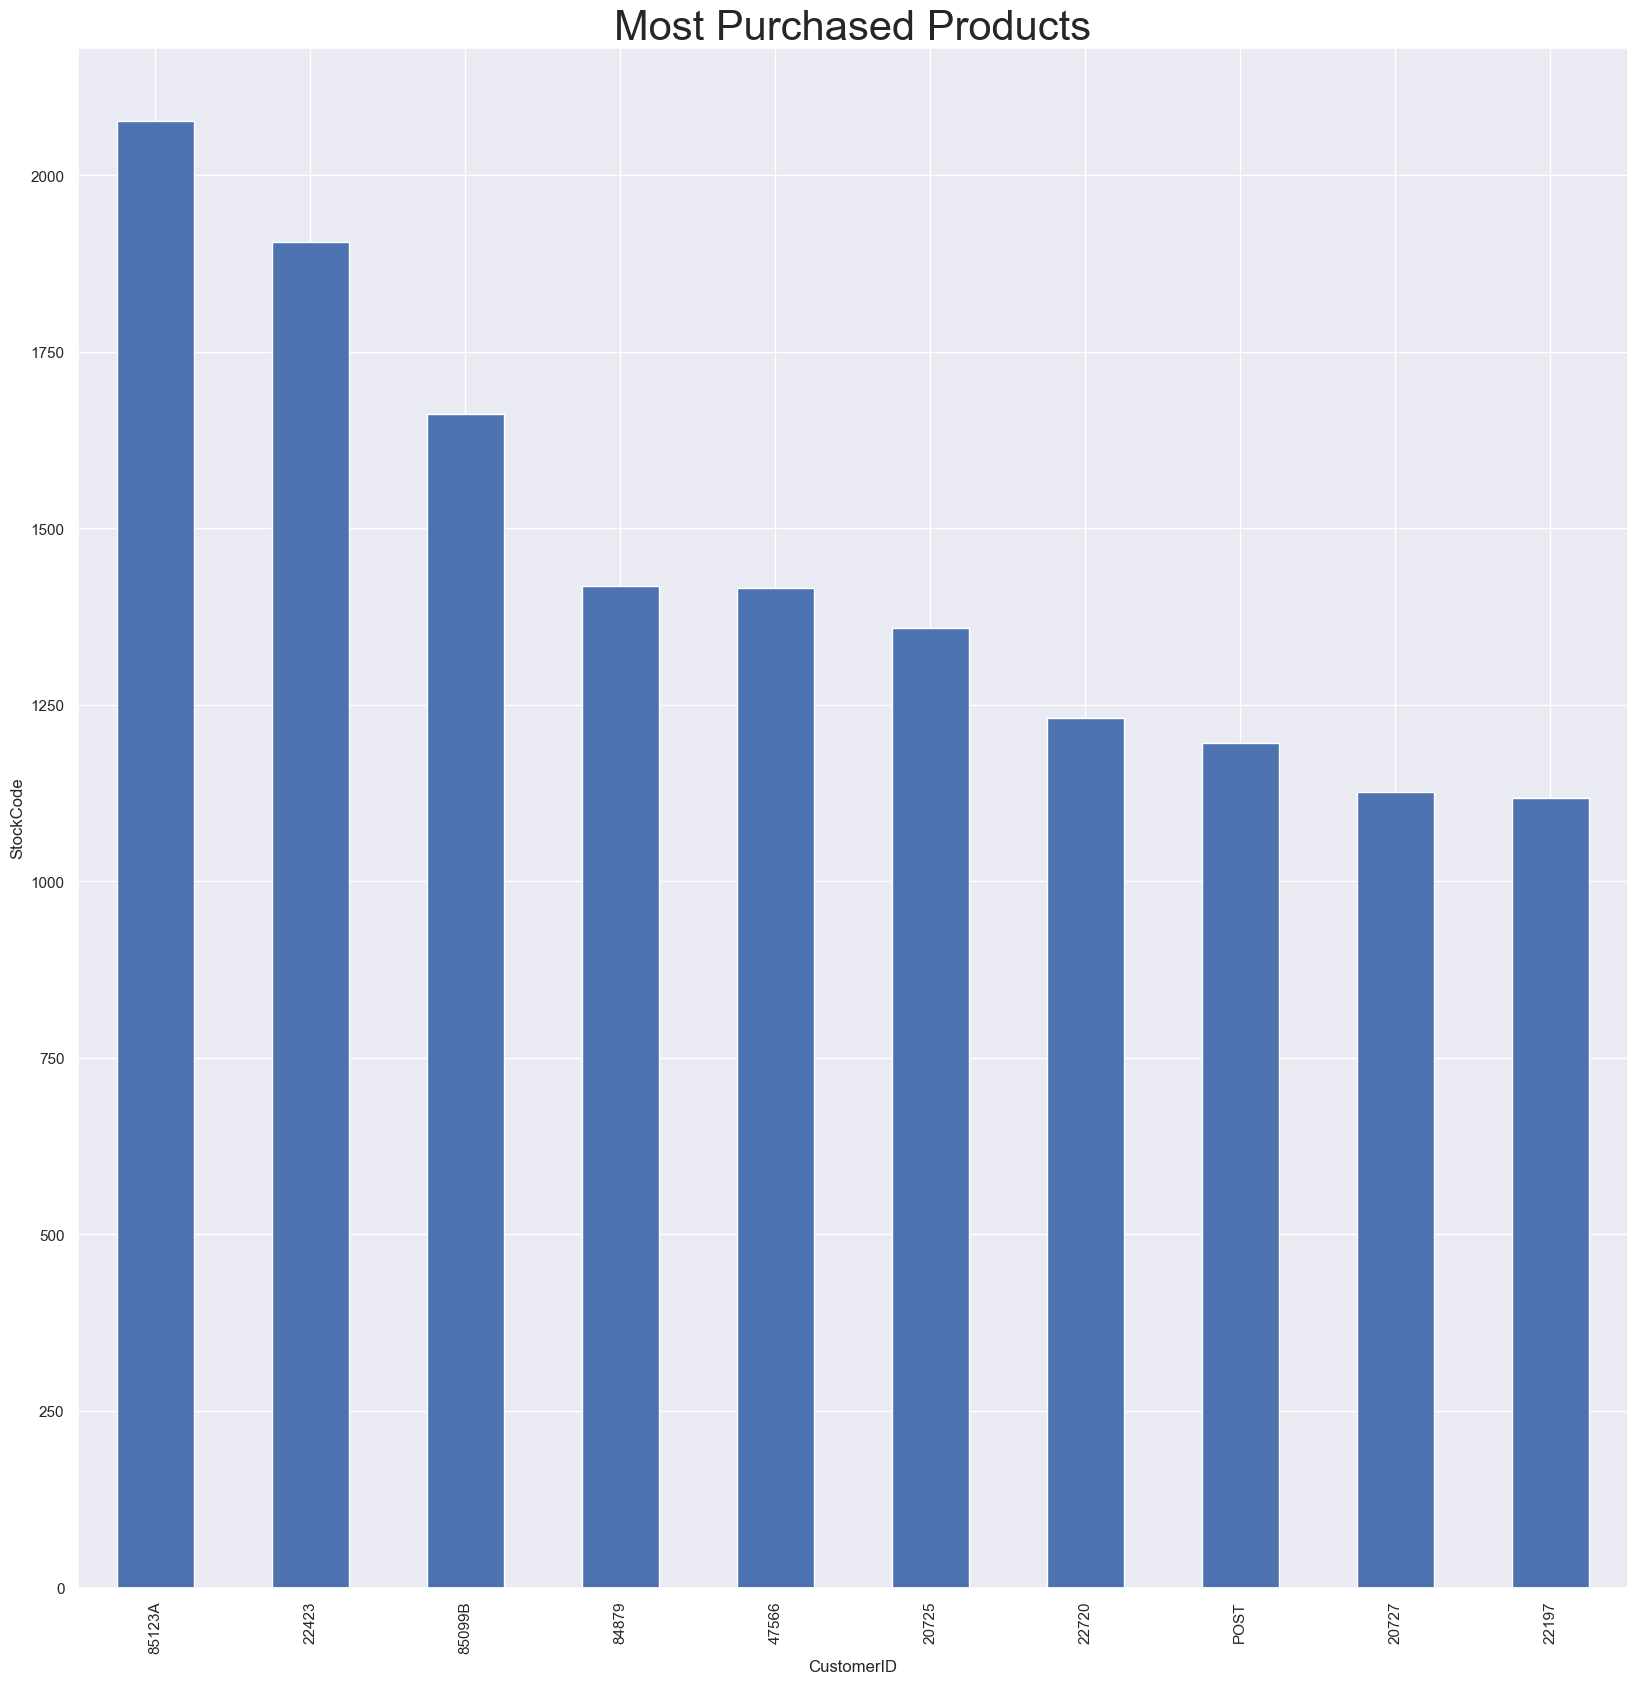

In [149]:
df.groupby('StockCode')['CustomerID'].count().nlargest(10).plot(kind='bar')
plt.xlabel('CustomerID')
plt.ylabel('StockCode')
plt.title("Most Purchased Products",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

In [186]:
stockcode_customer_counts = df.groupby('StockCode')['CustomerID'].nunique()
stockcode_customer_counts 

StockCode
10002     40
10080     19
10120     25
10125     49
10133    101
        ... 
D         24
DOT        1
M        276
PADS       4
POST     379
Name: CustomerID, Length: 3684, dtype: int64

In [190]:
# Group by 'StockCode' and count the number of unique 'CustomerID' for each 'StockCode'
stockcode_customer_counts = df.groupby('StockCode')['CustomerID'].nunique()
stockcode_less_than_10 = stockcode_customer_counts[stockcode_customer_counts < 10]
Stock_sold_less = pd.DataFrame({'StockCode': stockcode_less_than_10.index, 'Purchases': stockcode_less_than_10.values})
#Stock_sold_less = Stock_sold_less.merge(df, on='StockCode', how='inner')
#Stock_sold_less =Stock_sold_less [['StockCode','CustomerID','Purchases','Country','Description']]
print(f'There are {len(Stock_sold_less)} products that has been purchased less than 10 times ')

Stock_sold_less.head()


There are 887 products that has been purchased less than 10 times 


,StockCode,Purchases
0,16010,3
1,16033,4
2,16043,2
3,16049,5
4,16052,5


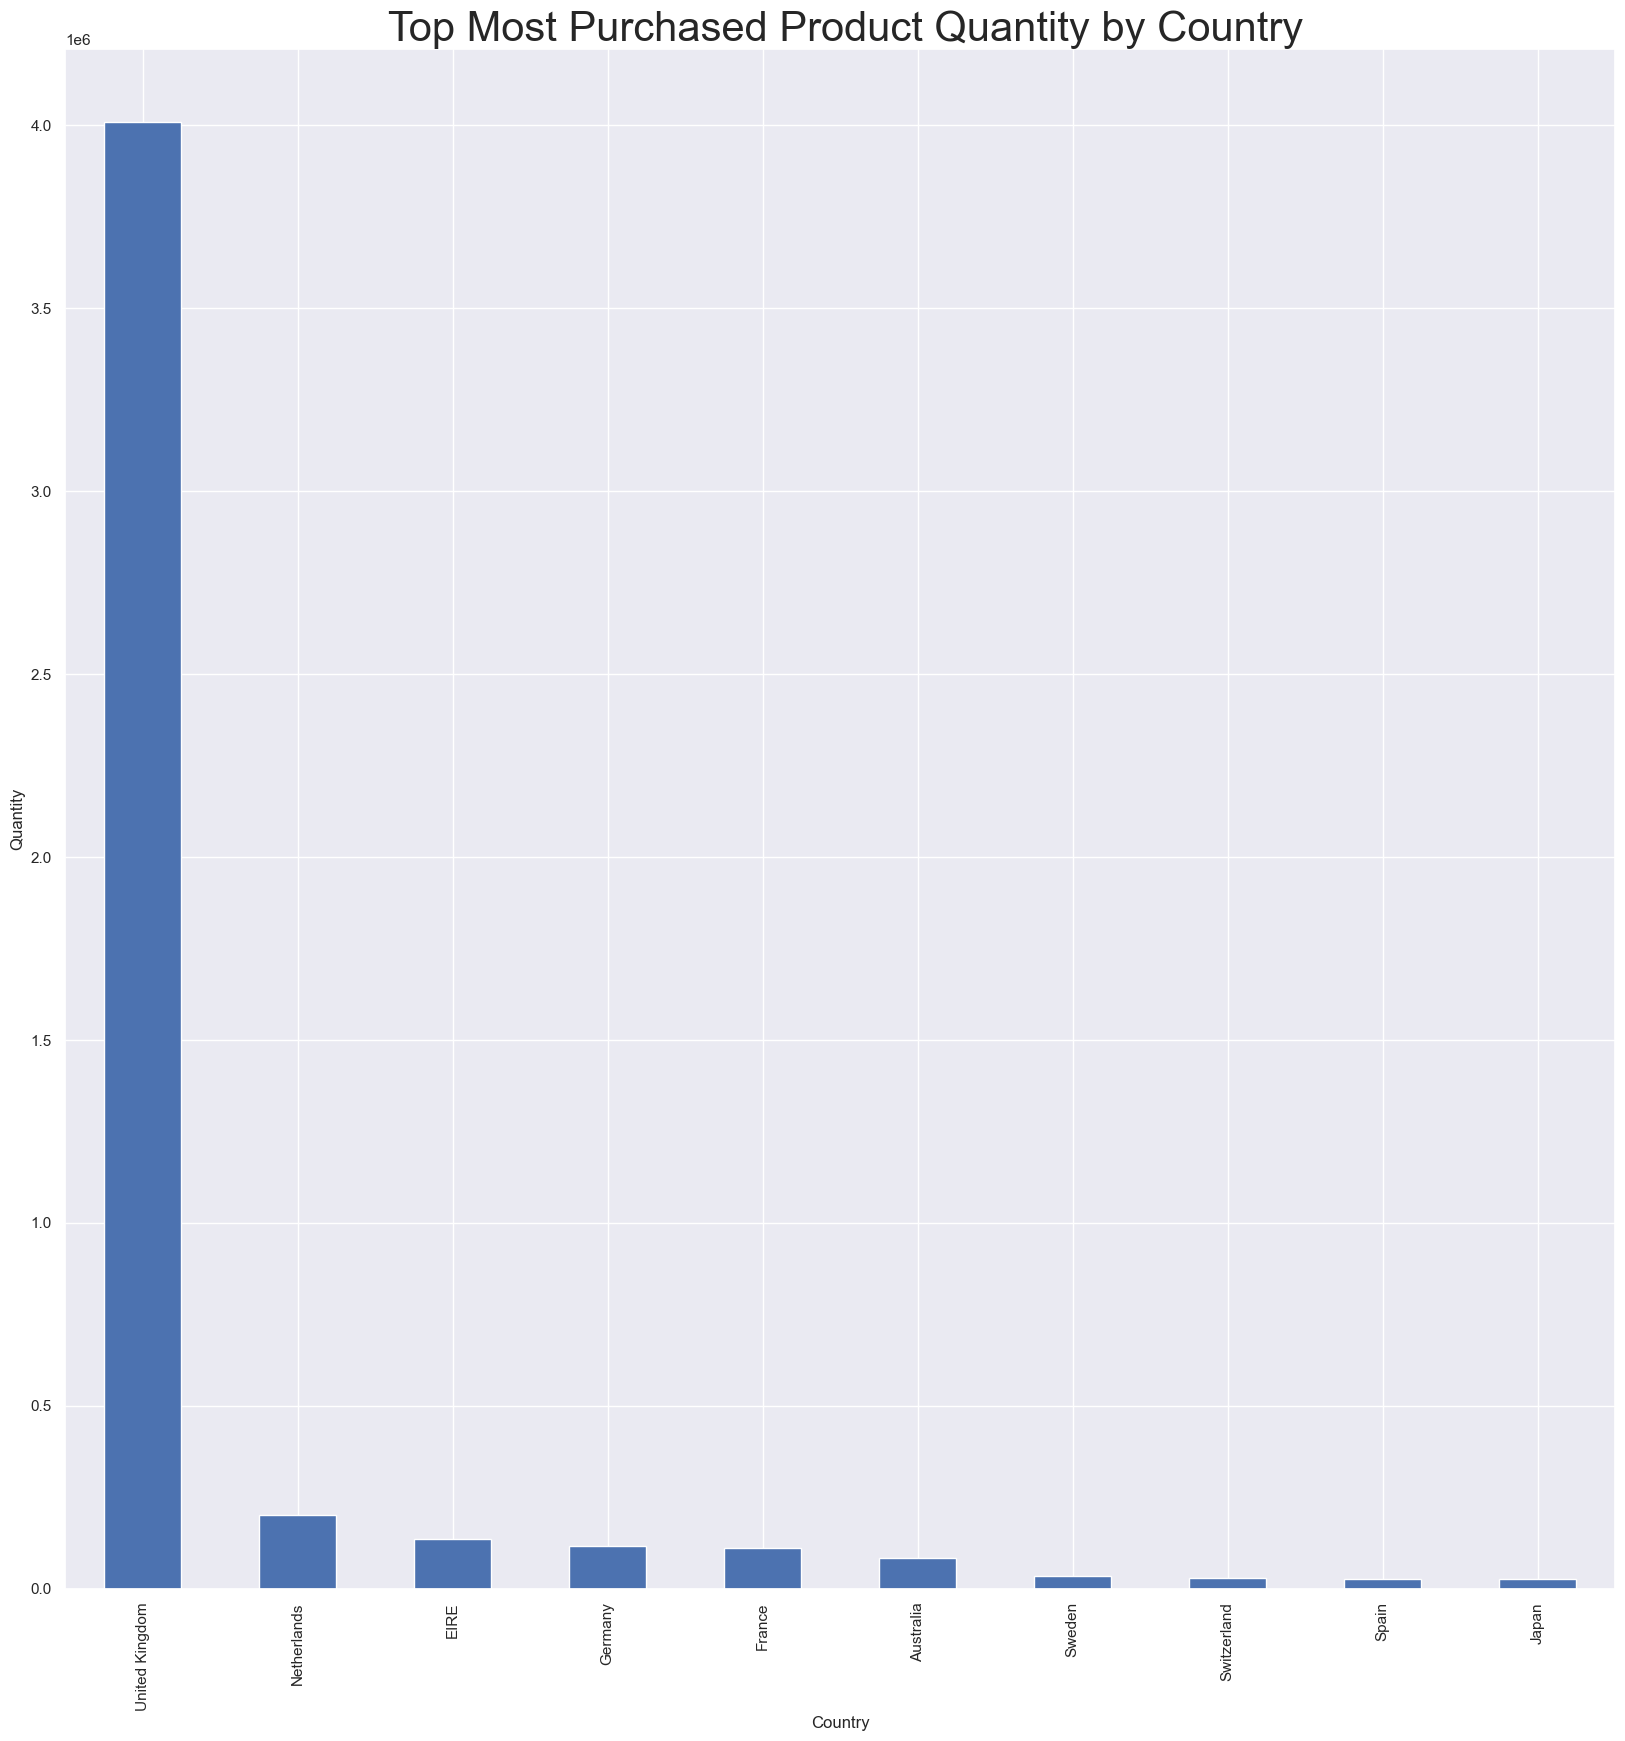

In [195]:
df.groupby('Country')['Quantity'].sum().nlargest(10).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Quantity')
plt.title(" Top Most Purchased Product Quantity by Country",fontdict = {'fontsize' : 30})
sns.set(rc={'figure.figsize':(20,20)})

<Axes: xlabel='Month'>

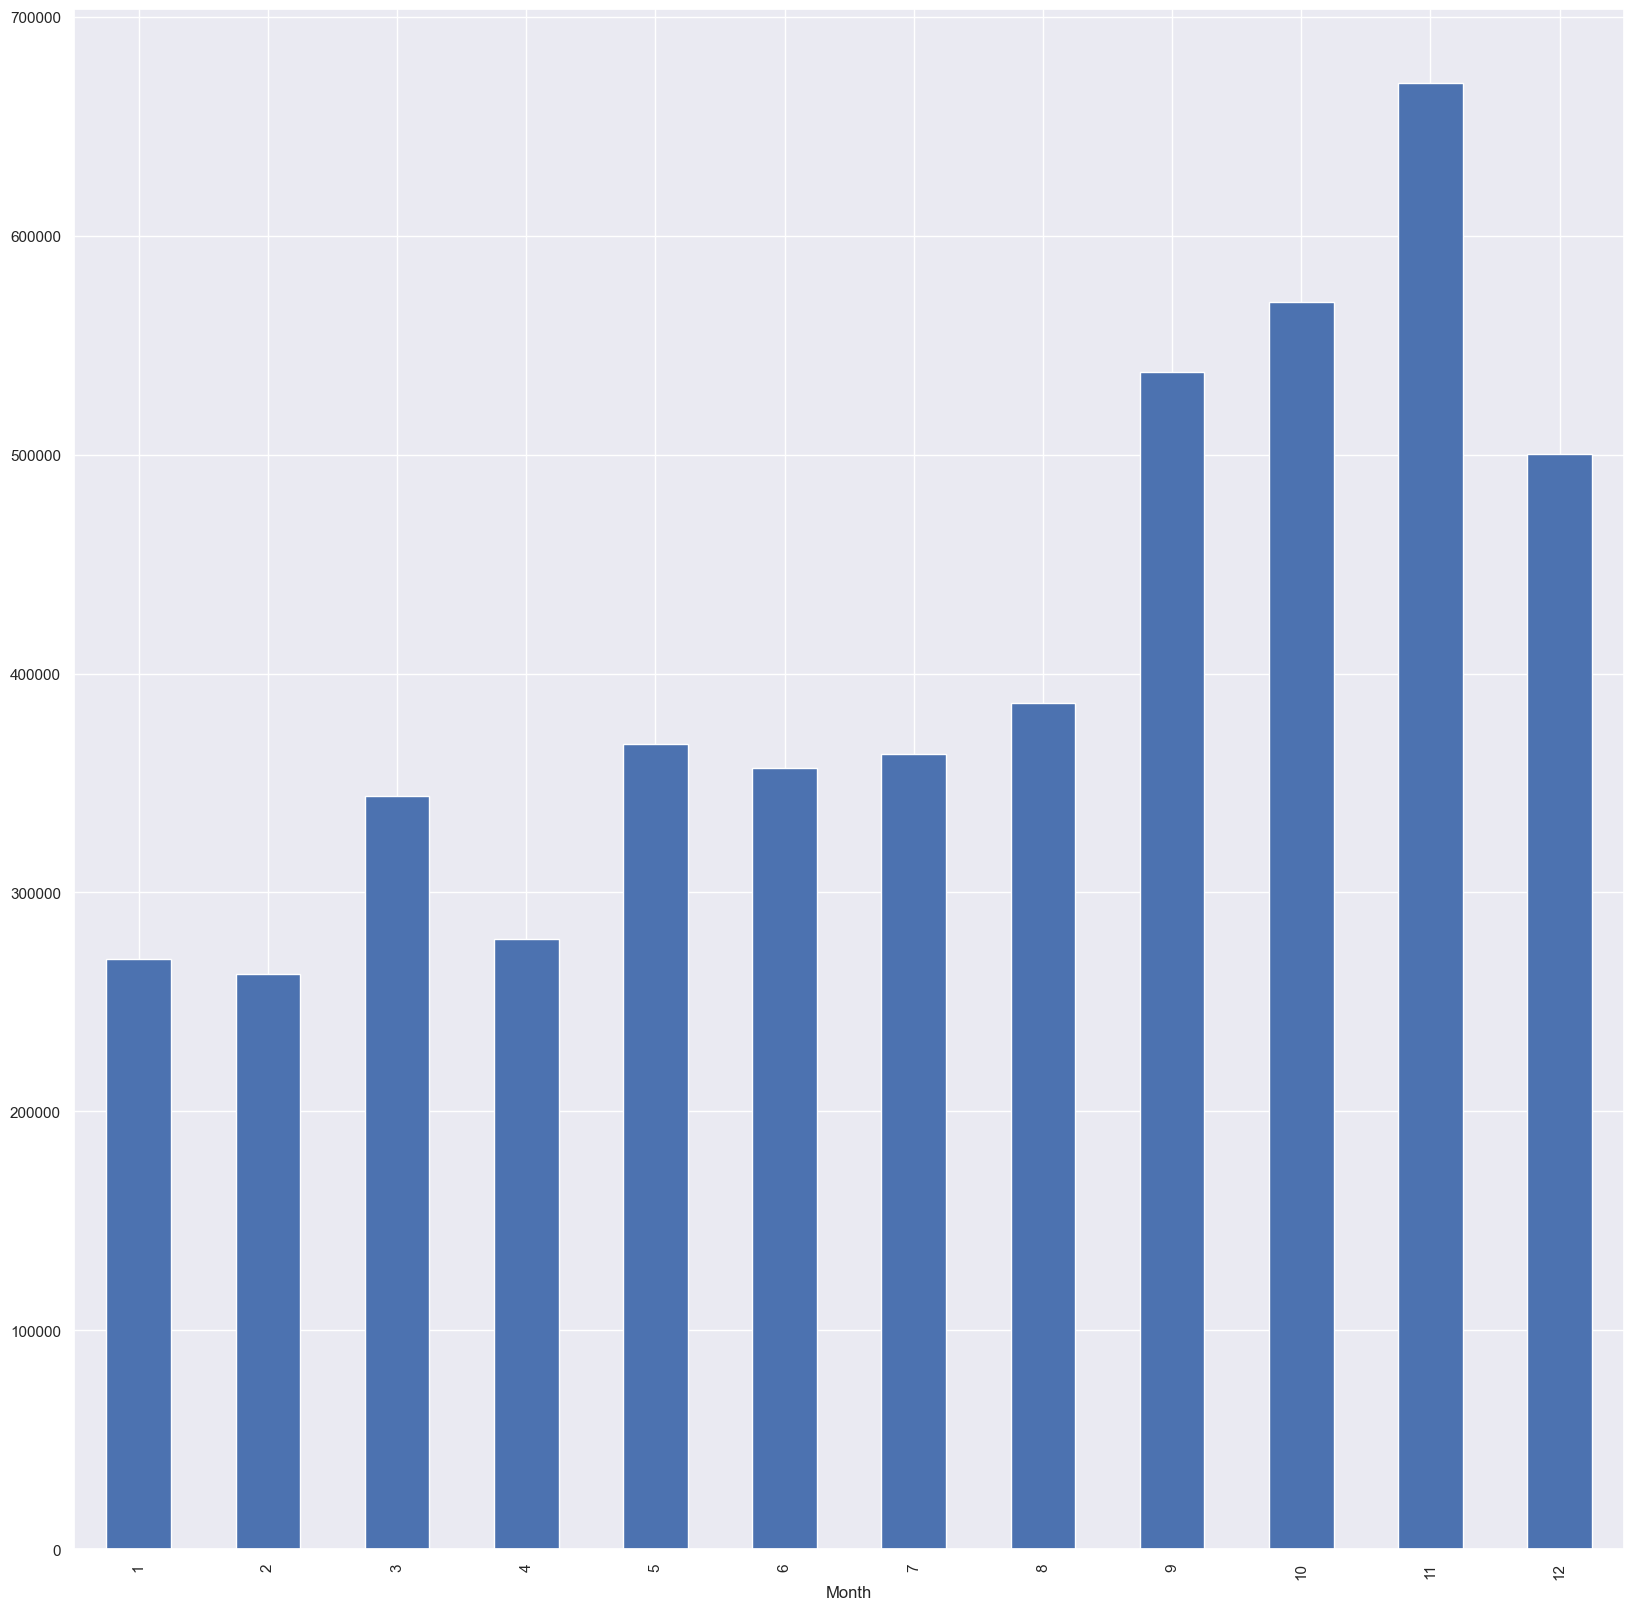

In [200]:
# Product quantity sold by month
df.groupby('Month')['Quantity'].sum().plot(kind='bar')

#### Customers

Let's check our customer spread
- across the country
- patronage by month

In [221]:
# Percentage of custmers across all countries
(df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False)/df['CustomerID'].nunique()) *100

Country
United Kingdom          90.347667
Germany                  2.172919
France                   1.989936
Spain                    0.709058
Belgium                  0.571821
Switzerland              0.480329
Portugal                 0.434584
Italy                    0.343092
Finland                  0.274474
Austria                  0.251601
Norway                   0.228728
Netherlands              0.205855
Australia                0.205855
Denmark                  0.205855
Channel Islands          0.205855
Cyprus                   0.182983
Sweden                   0.182983
Japan                    0.182983
Poland                   0.137237
USA                      0.091491
Canada                   0.091491
Unspecified              0.091491
Israel                   0.091491
Greece                   0.091491
EIRE                     0.068618
Malta                    0.045746
United Arab Emirates     0.045746
Bahrain                  0.045746
Czech Republic           0.022873
Lithua

<Axes: xlabel='Month'>

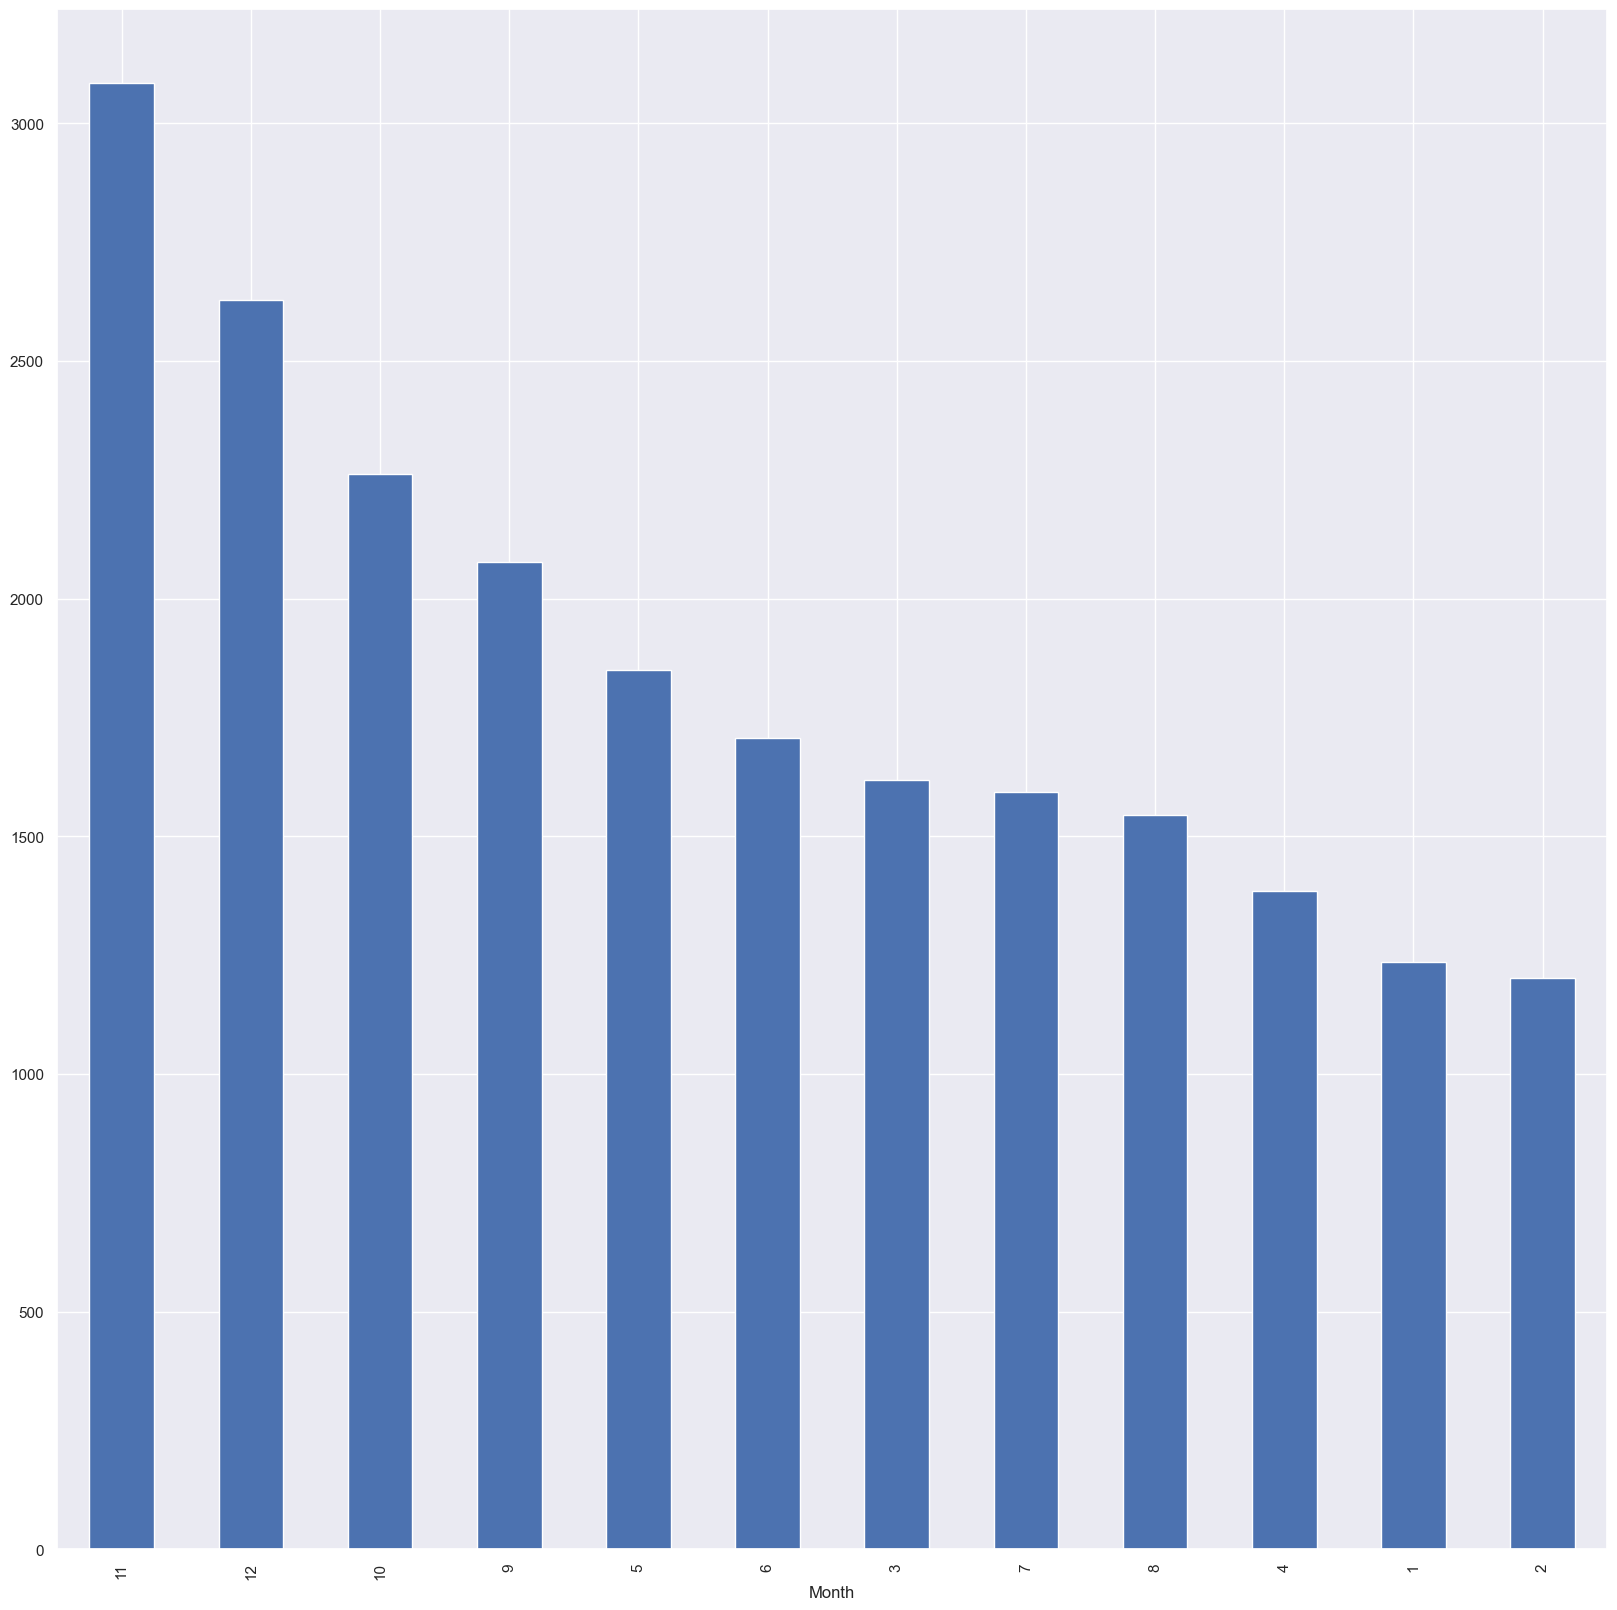

In [224]:
# No of transaction in each month
df.groupby('Month')['InvoiceNo'].nunique().sort_values(ascending=False).plot(kind='bar')

---

# Insights

This summary outlines various insights and observations made during analysis.

1. **Data Cleaning and Preprocessing:**
   - Null values in the `CustomerID` column were removed, constituting 24% of the data.
   - Additional columns were added by extracting information from the date column to assist with further analysis.

2. **Outliers and Negative Revenue:**
   - Outliers were observed in the dataset, particularly in terms of negative revenue.
   - Some products generated negative revenue, and product quantities were sometimes negative.
   - Further investigation is needed to understand the reasons behind these outliers.

3. **Dataset Summary Statistics:**
   - Summary statistics indicated extremely high quantities for some products.
   - The store operates in 37 countries, selling 4,372 different products to over 4,300 customers.

4. **Transaction and Revenue Insights:**
   - During the analysis period (Jan 1, 2010 - Dec 31, 2011), the store had over 22,000 transactions across all branches.
   - Revenue distribution ranged from -$4,000 to $4,000, with extreme cases of revenue exceeding $15,000 and less than -$15,000.
   - Singapore showed significant losses, while other countries like Japan, the Netherlands, and Austria generated the highest revenue.
   - Certain StockCodes contributed significantly to the total revenue.

5. **Seasonality and Best Selling Days:**
   - Seasonality was observed, with higher revenue generated in May, August, and September.
   - November had the most recorded transactions.
   - Sundays resulted in lower revenue compared to best-selling days like Thursdays and Tuesdays.
   - No data was captured for Saturdays, possibly indicating non-operation on that day.

6. **Peak Sales Hours:**
   - Peak sales occurred around 7 am, with potential losses when selling products earlier.

7. **Customer and Product Insights:**
   - Some products were sold to over 800 customers, while most products were sold to only one customer.
   - Popular products purchased by multiple customers included '85123A,' '22423,' and '85099B.'
   - Over 887 products were sold to less than 10 customers during the analysis period.
   - The majority of product purchases came from the United Kingdom, possibly indicating lower revenue products in that market.



---

## Recommendations

Here's a summary of my suggestions:

1. **Discontinue Low-Performing Products:**
   - Consider discontinuing products 'M,' 'CRUK,' and 'D' as they are yielding heavy losses. These products may not be economically viable, and resources can be better allocated to more profitable items.

2. **Optimize Product Stocking in the United Kingdom:**
   - In the United Kingdom, where the store has the highest customer base, focus on stocking products that have the potential to generate high revenue. Analyze customer preferences and market demand to make informed stocking decisions.

3. **Expand Customer Base in Top Revenue Countries:**
   - For countries like Japan, the Netherlands, and Austria, where the store is generating the highest revenue, explore strategies to expand the customer base. Target marketing efforts and customer acquisition in these regions to further increase revenue.

4. **In-Depth Analysis of Singapore:**
   - Conduct a detailed analysis of the Singapore market to understand customer purchasing power, demographics, shopping behavior, and the types of products that interest them. This information can guide strategies for improving performance in the Singapore market.

5. **Target Peak Sales Hours and Adjust Opening Times:**
   - Focus on sales during peak hours, such as 7 am and 6 pm. Consider adjusting store opening times to align with peak sales hours, ensuring that the store is not open before 7 am.

6. **Product Rationalization:**
   - Evaluate and potentially discontinue products that are least purchased by customers. This can help streamline product offerings and reduce inventory costs.

7. **Seasonal Opportunities:**
   - Capitalize on the revenue-generating potential of May, August, and September, which appear to be strong months. Conduct further analysis to understand if there is a specific season or event driving increased sales during these periods.



---

Based on the analysis and insights gotten from the dataset, I would suggest the following
1. Products 'M', 'CRUK', 'D' should be discontinued as they are yielding heavy losses
2. United Kingdom with the highest customer base should stock products that generate very high revenue
3. The top 3 countries generating revenue i.e Japan,Netherland and Austria should focus on improving customer base as threr is potential for more revenue to be generated here.
4. Further in-depth analysis should be carried out on Singapore to understand cutomer's purchasing power, demography, behavior and products they are interested in
5. The peak hours i.e 7 am and 6pm should be targeted for sales. Also, the store should not open before 7 am
6. Products that are least purchased by costomers should be discontinued or stocked in little quantities
7. May, August and september seems to be the months when revenue are generated the most. This could be due to a particular season. Furtehr analysis should be carried out

The dataset provided for the analysis has over 135,00 rows and 8 columns. The dataset was cleaned and prepared for analysis. During this process, null values in the CustomerID column constituting 24 % was removed from the data. Additional 5 columns were added to the dataset, all extracted form the date column to help us carry out further analysis.

The dataset contains outliers and could not be removed due to the impact they played on the data. The outliers represents that some of the products generated negative revenue as some product quantities were in the negative. Further analysis needs to be carried out to investigate why. From the summary statistics, we can also tell that we have products that have extremely high quantities, this could mean that the store sell some products in thousands while 75% of the store's products are less than than or equal 12 that were sold.

From our analysis, we can tell that the store operates in 37 countries, selling 4372 different products and have over 4,300 customers in all countries. Within the analysis period (Jan 1 2010 - Dec 31 2011) the store had over 22,000 transaction across all its branches in the world.

The revenue distributed by these transactions span majorly between $-4000 and $4000 while there are extreme cases of revenue hitting  $15,000 and above and less than $-15,000. Singapore should be focused on as a huge loss is coming from there. Although we have the highest customer base in the United Kingdom, a very little sum of revenue is generated from there when compared to Japan,Netherland and Austria which are the three highest revenue generating countries.StockCode '22423','85123A' and '85099B' are the top revenue generating products contributing 4% of total Revenue.Products 'M', 'CRUK', 'D' are yiedling heavy losses and should be looked into.

Seasonality can be seen in our data. May,August and September are good times of the year as more revenue are generated during this month but more transactions are recorded in the month of Novemeber.This simply means that people are buying products generating very little revenue more. Sundays are not really good for business as very small revenue is generated when compared to our best selling days like Thursdays and Tuesdays. There is no data captured for Saturdays. This could be that the store does not operate on this day.

The peak hour for sales is by 7 am and the stores are likely to make a loss when they sell products earlier than that. There are products taht has been sold to over 800 customers and majority of products are sold to one customer. Some of the very popular products purchased by several customers are '85123A', '22423', '85099B'. This is not a surprise as they bring in the most revenue. Over 887 products are sold to less than than 10 customers throughout the analysis period. Most of the product purchase is coming from the United Kingdom. This simply means that majority of the products sold in this country are not high revenue products.The